# Name - Krishna Anand
# UID - H2H11692K
# Roll No - 2005875
# 
# Machine Learning Final Project Submission

### Importing libraries

In [1]:
#data manupulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing data
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#models
import xgboost as xg
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

#hyperparemeter optimization
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [2]:
data=pd.read_csv('./Final.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

## 1.Modify the dataset to pass into any type of machine learning models

In [4]:
#Checking for missing values
data.isna().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [5]:
#Checking for unique purchase date order
POT=data['PURCHASE_ORDER_TYPE'].unique()
len(POT),POT

(351,
 array(['1000', 'I200', 'N000', 'N250', '9999', 'NAAA', '2590', 'N241',
        'DFUE', nan, 'S000', 'T001', 'F001', '110', '6222', '9140', '210',
        'URHA', 'A000', 'AZ40', 'I204', 'I186', 'IWHS', 'I183', '6219',
        '2554', '9291', 'IGRO', '1365', '1385', '1386', '1387', '2558',
        '1555', '3322', '1388', '1384', '1369', '2551', '7545', 'F708',
        'F000', 'F705', 'F592', 'F707', 'F710', 'IFGM', 'B000', 'S844',
        '2546', '4800', '6223', 'F999', '7559', '7542', '350', 'I001',
        '7541', 'I333', 'NHK3', 'I327', '1345', 'I203', 'I202', 'F704',
        'UCOL', 'KBAS', '1368', 'F593', '2575', '1383', 'N245', 'N244',
        'F706', 'I334', '120', 'N242', 'B242', '211', '7544', 'S342',
        'B251', 'B245', 'B252', 'B244', '5111', 'A225', 'A229', 'A234',
        'N120', '243', 'U001', 'A601', 'S787', 'N121', 'B241', 'S788',
        '320', 'N247', 'N217', '4111', 'A224', 'A758', 'A231', 'A223',
        'A226', 'A232', 'F697', 'A228', 'A233', 'F711', 'UST

In [6]:
#Unique credit status
OC=data['CREDIT_STATUS'].unique()
len(OC),OC

(4, array([nan, 93., 64., 52.]))

Both are catagorical data so can ne replaced with a new category 

In [7]:
#Filling missing values with mean
data['CREDIT_STATUS'].fillna(round(data['CREDIT_STATUS'].mean()),inplace=True)
data['PURCHASE_ORDER_TYPE'].fillna('NEWCAT',inplace=True)

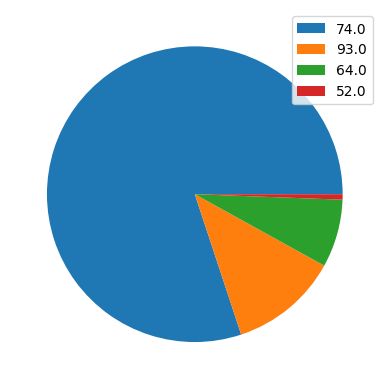

In [8]:
#Plotting pie chart
plt.pie(data['CREDIT_STATUS'].value_counts())
plt.legend(data['CREDIT_STATUS'].unique())
plt.show()

newly added category is in minority so we can go forward

In [9]:
#Checking if all values if ascending order or not
np.all(np.diff((data['ORDER_CREATION_DATE'])) >= 0)

False

Sanity check

In [10]:
#Deleting invalid rows
data.drop(data.loc[data['ORDER_CREATION_DATE']>data['REQUESTED_DELIVERY_DATE']].index,axis=0,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64  
 1   SALES_ORG                1074783 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object 
 3   DIVISION                 1074783 non-null  object 
 4   RELEASED_CREDIT_VALUE    1074783 non-null  object 
 5   PURCHASE_ORDER_TYPE      1074783 non-null  object 
 6   COMPANY_CODE             1074783 non-null  int64  
 7   ORDER_CREATION_DATE      1074783 non-null  int64  
 8   ORDER_CREATION_TIME      1074783 non-null  int64  
 9   CREDIT_CONTROL_AREA      1074783 non-null  object 
 10  SOLD_TO_PARTY            1074783 non-null  int64  
 11  ORDER_AMOUNT             1074783 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1074783 non-null  int64  
 13  ORDER_CURRENCY           1074783 non-null 

In [12]:
len(data['CUSTOMER_ORDER_ID'].unique())

1072429

In [13]:
data['ORDER_AMOUNT']=data['ORDER_AMOUNT'].str.replace('-','')
data['ORDER_AMOUNT']=data['ORDER_AMOUNT'].str.replace(',','.')
data['ORDER_AMOUNT']=data['ORDER_AMOUNT'].astype('float64')

In [14]:
data['RELEASED_CREDIT_VALUE']=data['RELEASED_CREDIT_VALUE'].str.replace('-','')
data['RELEASED_CREDIT_VALUE']=data['RELEASED_CREDIT_VALUE'].str.replace(',','.')
data['RELEASED_CREDIT_VALUE']=data['RELEASED_CREDIT_VALUE'].astype('float64')

Adding new features to the dataset 

In [15]:
#Adding unique cust id feature
data['UNIQUE_CUST_ID']=data['CUSTOMER_ORDER_ID'].astype('str')+data['CUSTOMER_NUMBER'].astype('str')
data['UNIQUE_CUST_ID']=data['UNIQUE_CUST_ID'].astype('float64')

In [16]:
#Converting into datatime format for the required operation
data['REQUESTED_DELIVERY_DATE']=pd.to_datetime(data['REQUESTED_DELIVERY_DATE'],format="%Y%m%d")
data['ORDER_CREATION_DATE']=pd.to_datetime(data['ORDER_CREATION_DATE'],format="%Y%m%d")

In [17]:
data.sort_values(['ORDER_CREATION_DATE','ORDER_CREATION_TIME'],inplace=True)

In [18]:
data['D1CC_PRIOR_AMT']=data.groupby(['COMPANY_CODE']).shift(1)['ORDER_AMOUNT'].fillna(0)
data['D2CC_PRIOR_AMT']=data.groupby(['COMPANY_CODE']).shift(2)['ORDER_AMOUNT'].fillna(0)

data['D1CC_DIFF_AMT']=data.groupby(['COMPANY_CODE'])['D1CC_PRIOR_AMT'].diff().fillna(0)
data['D2CC_DIFF_AMT']=data.groupby(['COMPANY_CODE'])['D2CC_PRIOR_AMT'].diff().fillna(0)

In [19]:
data['D1SO_PRIOR_AMT']=data.groupby(['SALES_ORG']).shift(1)['ORDER_AMOUNT'].fillna(0)
data['D2SO_PRIOR_AMT']=data.groupby(['SALES_ORG']).shift(2)['ORDER_AMOUNT'].fillna(0)

data['D1SO_DIFF_AMT']=data.groupby(['SALES_ORG'])['D1SO_PRIOR_AMT'].diff().fillna(0)
data['D2SO_DIFF_AMT']=data.groupby(['SALES_ORG'])['D2SO_PRIOR_AMT'].diff().fillna(0)

[]

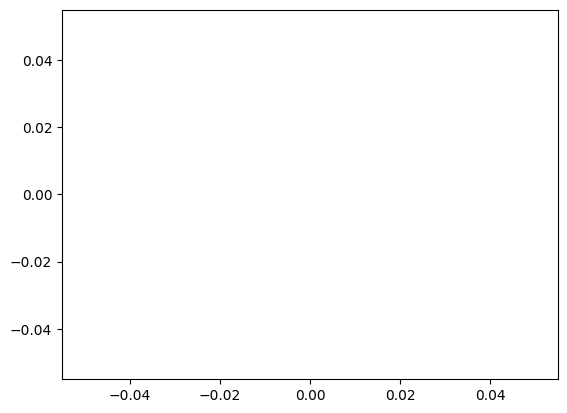

In [20]:
plt.plot()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074783 entries, 309976 to 309909
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1074783 non-null  int64         
 1   SALES_ORG                1074783 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1074783 non-null  object        
 3   DIVISION                 1074783 non-null  object        
 4   RELEASED_CREDIT_VALUE    1074783 non-null  float64       
 5   PURCHASE_ORDER_TYPE      1074783 non-null  object        
 6   COMPANY_CODE             1074783 non-null  int64         
 7   ORDER_CREATION_DATE      1074783 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1074783 non-null  int64         
 9   CREDIT_CONTROL_AREA      1074783 non-null  object        
 10  SOLD_TO_PARTY            1074783 non-null  int64         
 11  ORDER_AMOUNT             1074783 non-null  float64       
 

In [22]:
data['OCDATE']=data['ORDER_CREATION_DATE'].dt.day
data['OCMONTH']=data['ORDER_CREATION_DATE'].dt.month
data['OCDAY']=data['ORDER_CREATION_DATE'].dt.weekday

data['RDDATE']=data['REQUESTED_DELIVERY_DATE'].dt.day
data['RDMONTH']=data['REQUESTED_DELIVERY_DATE'].dt.month
data['RDDAY']=data['REQUESTED_DELIVERY_DATE'].dt.weekday

data['DAYS_TO_PROCESS']=(data['REQUESTED_DELIVERY_DATE']-data['ORDER_CREATION_DATE']).dt.days

In [23]:
data

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,D2SO_PRIOR_AMT,D1SO_DIFF_AMT,D2SO_DIFF_AMT,OCDATE,OCMONTH,OCDAY,RDDATE,RDMONTH,RDDAY,DAYS_TO_PROCESS
309976,783626976,4080,Barbados,North-Region,1676.91,C000,3590,2022-01-01,16,NR03,...,0.0,0.00,0.0,1,1,5,17,1,0,16
309977,904677515,2414,Seychelles,South-Region,0.00,X001,3670,2022-01-01,3908,NR01,...,0.0,0.00,0.0,1,1,5,13,1,3,12
309978,821300169,2971,Christmas Island,North-Region,0.00,X000,3660,2022-01-01,40020,SR03,...,0.0,0.00,0.0,1,1,5,11,1,1,10
309979,945898381,3500,Tuvalu,North-Region,0.00,X000,3660,2022-01-01,40312,SR01,...,0.0,0.00,0.0,1,1,5,11,1,1,10
0,946851639,3537,United States of America,South-Region,0.00,1000,3220,2022-01-01,43012,SR02,...,0.0,0.00,0.0,1,1,5,13,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309905,984324653,3824,Samoa,North-Region,0.00,110,3350,2022-06-01,233008,NR02,...,510.4,-510.40,-623.6,1,6,2,14,6,1,13
309904,907330235,3588,Timor-Leste,North-Region,0.00,9999,3320,2022-06-01,233026,SR02,...,0.0,0.00,0.0,1,6,2,6,6,0,5
309907,792696599,2660,Lithuania,North-Region,0.00,9999,150,2022-06-01,233352,NR02,...,0.0,97.12,-183.7,1,6,2,7,6,1,6
309908,958261571,2448,Antigua and Barbuda,North-Region,0.00,9999,150,2022-06-01,233716,NR01,...,0.0,0.00,0.0,1,6,2,7,6,1,6


In [24]:
for_label=data.select_dtypes('object')

In [25]:
for_label.columns

Index(['DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE',
       'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY'],
      dtype='object')

In [26]:

label_encoder = LabelEncoder()
for i in for_label:
    data[i]= label_encoder.fit_transform(data[i]).astype('int64')

<AxesSubplot: >

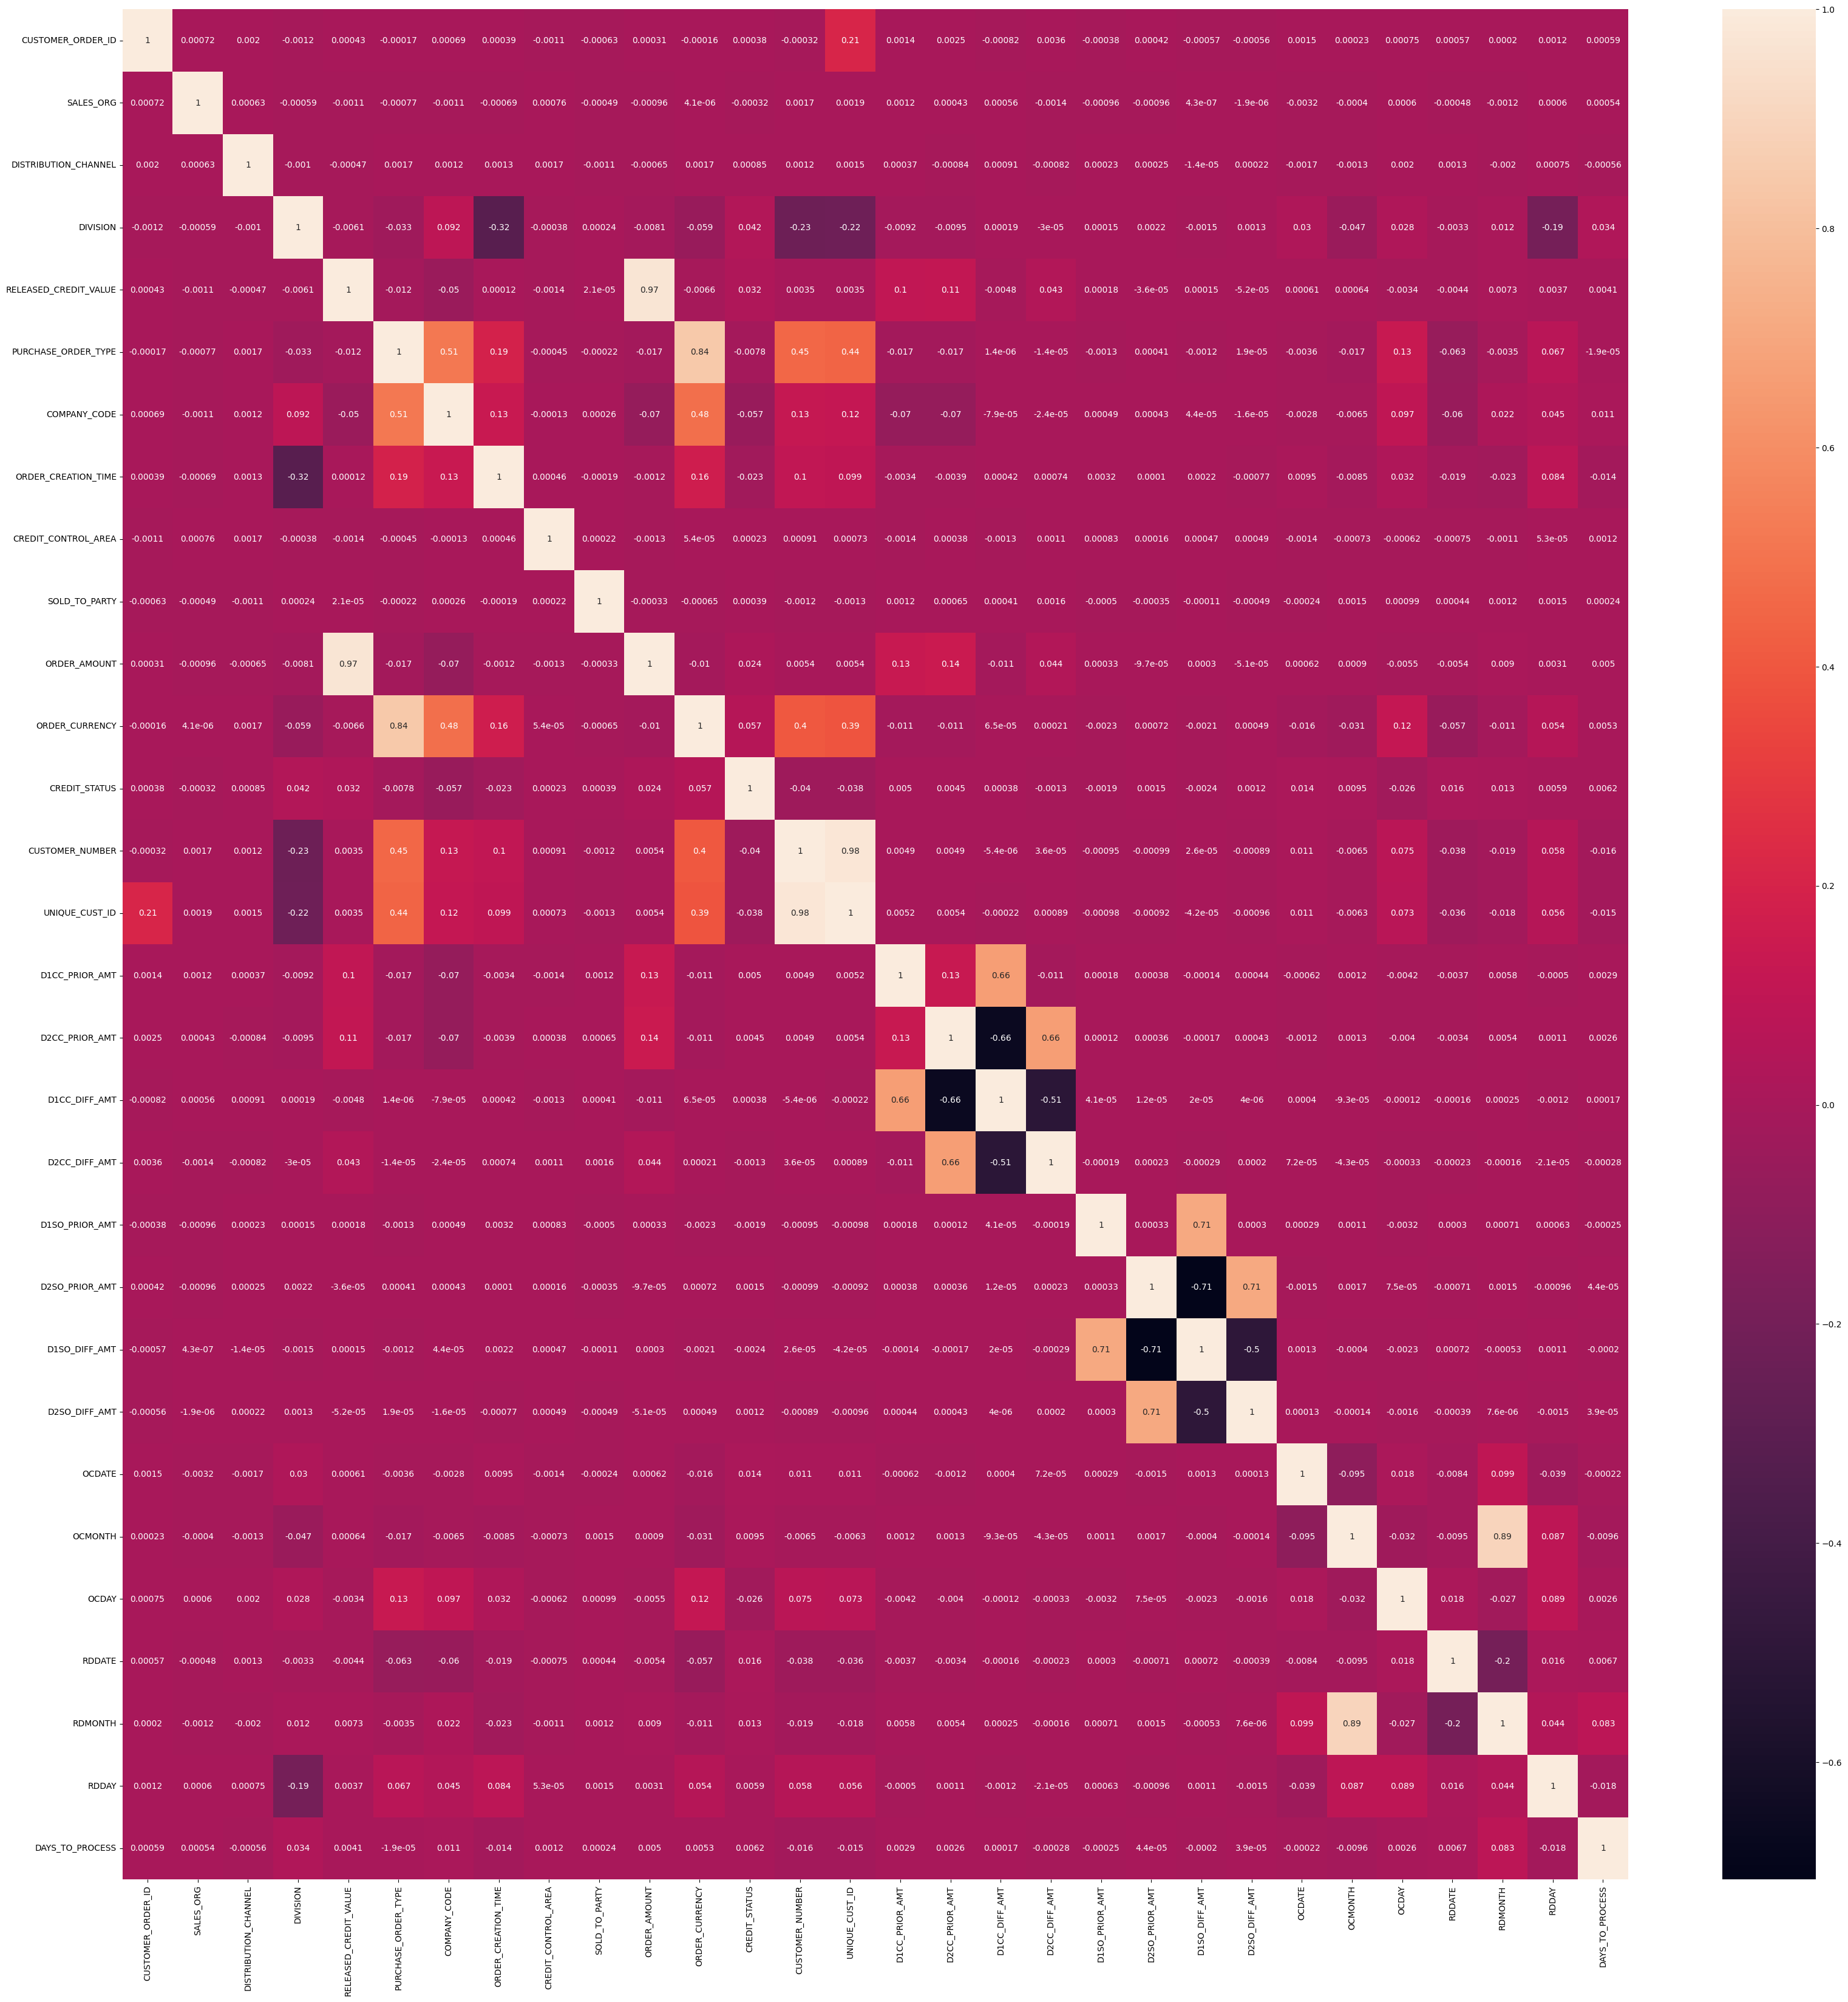

In [27]:
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [28]:
selected_features=data.drop(['CUSTOMER_ORDER_ID',
                             'ORDER_CREATION_DATE',
                             'REQUESTED_DELIVERY_DATE',
                             'ORDER_AMOUNT',
                             'CUSTOMER_NUMBER'],axis=1).columns

In [29]:
(selected_features)

Index(['SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION',
       'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE',
       'ORDER_CREATION_TIME', 'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY',
       'ORDER_CURRENCY', 'CREDIT_STATUS', 'UNIQUE_CUST_ID', 'D1CC_PRIOR_AMT',
       'D2CC_PRIOR_AMT', 'D1CC_DIFF_AMT', 'D2CC_DIFF_AMT', 'D1SO_PRIOR_AMT',
       'D2SO_PRIOR_AMT', 'D1SO_DIFF_AMT', 'D2SO_DIFF_AMT', 'OCDATE', 'OCMONTH',
       'OCDAY', 'RDDATE', 'RDMONTH', 'RDDAY', 'DAYS_TO_PROCESS'],
      dtype='object')


splitting the training and testing sets

In [30]:
X_data=data[selected_features]
Y_data=data['ORDER_AMOUNT']

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.33,random_state=3,shuffle=True)

In [32]:
Y_test

277878     3203.78
95502        76.86
220713        0.00
1090831    1043.43
146409      961.30
            ...   
519697       79.82
325922        0.00
52797         0.00
319228     1230.83
598666       77.24
Name: ORDER_AMOUNT, Length: 354679, dtype: float64

In [33]:
def sig(x):
    return 1/(1 + np.exp(-x))

In [34]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
target_scaler = StandardScaler()
Y_train = target_scaler.fit_transform(np.array(Y_train).reshape(-1,1))
Y_test = target_scaler.transform(np.array(Y_test).reshape(-1,1))

## 2.Try different machine learning models like - 
<ol>
    <li>Linear Regression</li>
    <li>Support Vector Machine </li>
    <li>Decision Tree</li>
    <li>Random Forest </li>
    <li>AdaBoost</li>
    <li>Xgboost etc. </li>
</ol>

#### Linear Regression 

In [35]:
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)

LinearRegression()

In [36]:
 reg_model.score(X_test, Y_test)

0.8824559046186747

#### SVM

In [37]:
sv_reg_model = SVR(kernel="poly")

In [38]:
sv_reg_model.fit(X_train, Y_train.flatten())

SVR(kernel='poly')

In [39]:
sv_reg_model.score(X_test,Y_test)

-6.433165504016974

#### Decision Tree

In [40]:
DT_reg_model = DecisionTreeRegressor(max_depth=5)

In [41]:
DT_reg_model.fit(X_train, Y_train.flatten())

DecisionTreeRegressor(max_depth=5)

In [42]:
DT_reg_model.score(X_test,Y_test)

0.8380039112558614

#### Random Forest 

In [43]:
RFR_reg_model = RandomForestRegressor(max_depth=2, random_state=0)

In [44]:
RFR_reg_model.fit(X_train, Y_train.flatten())

RandomForestRegressor(max_depth=2, random_state=0)

In [45]:
RFR_reg_model.score(X_test,Y_test)

0.8419652674777597

#### AdaBoost

In [46]:
ada_reg_model = AdaBoostRegressor(random_state=0, n_estimators=10)
ada_reg_model.fit(X_train, Y_train.flatten())

AdaBoostRegressor(n_estimators=10, random_state=0)

In [47]:
ada_reg_model.score(X_test, Y_test)

0.23513931108832908

#### XgBoost

In [48]:
xgb_reg_model = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 123)

In [49]:
xgb_reg_model.fit(X_train, Y_train.flatten())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
xgb_reg_model.score(X_test,Y_test)

0.8690050760981104

In [64]:
RFR_reg_model.score(X_train,Y_train)

0.9175114640204534

In [51]:
target_scaler.inverse_transform(xgb_reg_model.predict(X_test).reshape(-1,1)),target_scaler.inverse_transform(Y_test)

(array([[ 952.3304 ],
        [ 518.5164 ],
        [ 504.29767],
        ...,
        [ 504.29767],
        [1175.1112 ],
        [ 867.7601 ]], dtype=float32),
 array([[3203.78],
        [  76.86],
        [   0.  ],
        ...,
        [   0.  ],
        [1230.83],
        [  77.24]]))

There is a high variance in the prediction and real amount 

## 3. Perform Regression model evaluations like MSE, RMSE, R-Square etc. 

In [52]:


def RSq(a,b):
    return r2_score(a,b)
def MSE(a,b):
    return mean_squared_error(a,b)
def RMSE(a,b):
    return np.sqrt(MSE(a,b))

In [70]:
comparision_metric=pd.DataFrame(columns=['Linear Regression',
'Support Vector Machine',
'Decision Tree',
'Random Forest',
'AdaBoost',
'Xgboost'],index=['MSE','RMSE','R2_test','R2_train'],dtype='float64')

In [71]:
models={
'Linear Regression':reg_model,
'Support Vector Machine':sv_reg_model,
'Decision Tree':DT_reg_model,
'Random Forest':RFR_reg_model,
'AdaBoost':ada_reg_model,
'Xgboost':xgb_reg_model
}

Computing and storing all the Metrics in DF for comparision

In [72]:
for i in comparision_metric:
    pred_com=models[i].predict(X_test)
    comparision_metric[i]['MSE']=MSE(pred_com,Y_test)
    comparision_metric[i]['RMSE']=np.sqrt(comparision_metric[i]['MSE'])
    comparision_metric[i]['R2_test']=RSq(pred_com,Y_test)
    pred_train=models[i].predict(X_train)
    comparision_metric[i]['R2_train']=RSq(pred_train,Y_train)


In [73]:
comparision_metric

,Linear Regression,Support Vector Machine,Decision Tree,Random Forest,AdaBoost,Xgboost
MSE,0.045824,8.639201e+07,0.063153,0.061609,0.298177,0.051068
RMSE,0.214065,9.294730e+03,0.251303,0.248212,0.546056,0.225982
R2_test,0.898199,-1.782027e-06,0.873316,0.836094,0.706202,0.902157
R2_train,0.951023,3.203035e-04,0.965840,0.879599,0.914765,0.993498


## 4. Compare the accuracies of all the models 

,Linear Regression,Support Vector Machine,Decision Tree,Random Forest,AdaBoost,Xgboost
MSE,0.045824,8.639201e+07,0.063153,0.061609,0.298177,0.051068
RMSE,0.214065,9.294730e+03,0.251303,0.248212,0.546056,0.225982
R2_test,0.898199,-1.782027e-06,0.873316,0.836094,0.706202,0.902157
R2_train,0.951023,3.203035e-04,0.965840,0.879599,0.914765,0.993498


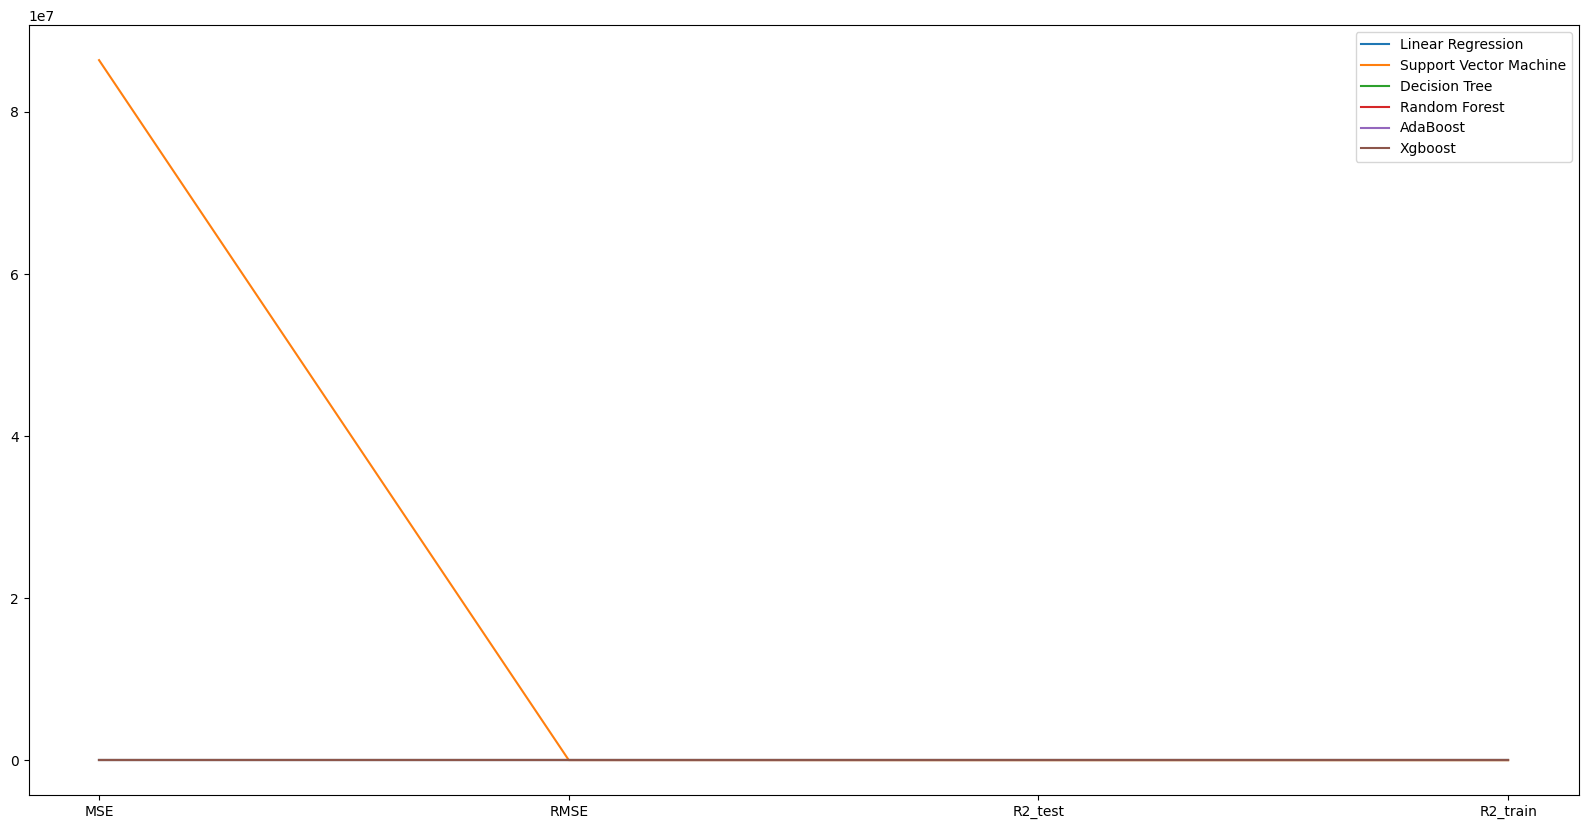

In [74]:
plt.figure(figsize=(20,10))
plt.plot((comparision_metric))#loss of acctual value but has better visualization
plt.legend(comparision_metric.columns)
comparision_metric

## 5. Select the best possible model

<p style='font-size:1.5rem'>From the above observed data and graph we can see that <b>XG Boost</b> performs with best R<sup>2</sup> Score and has the minimum MSE and RMSE.</p>

## 6. Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms

In [75]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 123
    }

In [76]:
def objective(space):
    reg=xg.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    reg.fit(X_train, Y_train)
    pred_val=reg.predict(X_test)
    mse=MSE(pred_val,Y_test)
    r2s=RSq(pred_val,Y_test)
    print('MSE: ',mse,'RMSE: ',np.sqrt(mse),'R2: ',r2s)
    return {'loss': -r2s, 'status': STATUS_OK}

In [77]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 50,
                        trials = trials)

MSE:                                                                                                                   
0.07858260200941027                                                                                                    
RMSE:                                                                                                                  
0.2803258853716693                                                                                                     
R2:                                                                                                                    
0.7268139362501702                                                                                                     
MSE:                                                                                                                   
0.09190587930891199                                                                                                    
RMSE:                                   

R2:                                                                                                                    
0.7789960497184354                                                                                                     
MSE:                                                                                                                   
0.07473019758692419                                                                                                    
RMSE:                                                                                                                  
0.27336824538875065                                                                                                    
R2:                                                                                                                    
0.733579720004445                                                                                                      
MSE:                                    

RMSE:                                                                                                                  
0.2736223612341496                                                                                                     
R2:                                                                                                                    
0.7464988031793427                                                                                                     
MSE:                                                                                                                   
0.0732509645890028                                                                                                     
RMSE:                                                                                                                  
0.2706491540518884                                                                                                     
R2:                                     

In [78]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9128257469567094, 'gamma': 2.8285287844604, 'max_depth': 3.0, 'min_child_weight': 2.0, 'reg_alpha': 179.0, 'reg_lambda': 0.004606543400491214}


The best model with best accuracy possible is using <b>XGBoost</b> and having <b>78.93% accuracy</b> and best suited hyperparameters are.
    <ul>
    <li>colsample_bytree: 0.9128</li>
    <li>gamma: 2.8285</li>
    <li>max_depth: 3.0</li>
    <li>min_child_weight: 2.0</li>
    <li>reg_alpha: 179.0</li>
    <li>reg_lambda: 0.0046</li>
    </ul>

In [79]:
xgb_best=xg.XGBRegressor(
    colsample_bytree=best_hyperparams['colsample_bytree'],
    gamma=best_hyperparams['gamma'],
    max_depth=int(best_hyperparams['max_depth']), 
    min_child_weight=best_hyperparams['min_child_weight'],
    reg_alpha=best_hyperparams['reg_alpha'], 
    reg_lambda=best_hyperparams['reg_lambda'],
    n_estimators =100,
    seed=123)

In [80]:
xgb_best.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9128257469567094, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2.8285287844604, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=2.0, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [81]:
xgb_best.score(X_train,Y_train)

0.9392349137476103

In [82]:
xgb_best.score(X_test,Y_test)

0.8483931390337002

The models fitness doesn't improve so we can say that the hyper tuning was not required. 

In [83]:
predicted_values=target_scaler.inverse_transform(xgb_reg_model.predict(X_test).reshape(-1,1))

In [84]:
actual_values=target_scaler.inverse_transform(Y_test)

In [85]:
df_data=np.array([predicted_values.flatten(),actual_values.flatten()]).transpose()

In [86]:
valuesDF=pd.DataFrame(df_data,columns=['PREDICTED','ACTUAL'])

In [115]:
valuesDF

,PREDICTED,ACTUAL
0,952.330383,3203.78
1,518.516418,76.86
2,504.297668,0.00
3,2884.527832,1043.43
4,210.440750,961.30
...,...,...
354674,1495.404175,79.82
354675,875.949036,0.00
354676,504.297668,0.00
354677,1175.111206,1230.83


We take log to avoid skewness 

C:\Users\osman\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot: xlabel='PREDICTED', ylabel='ACTUAL'>

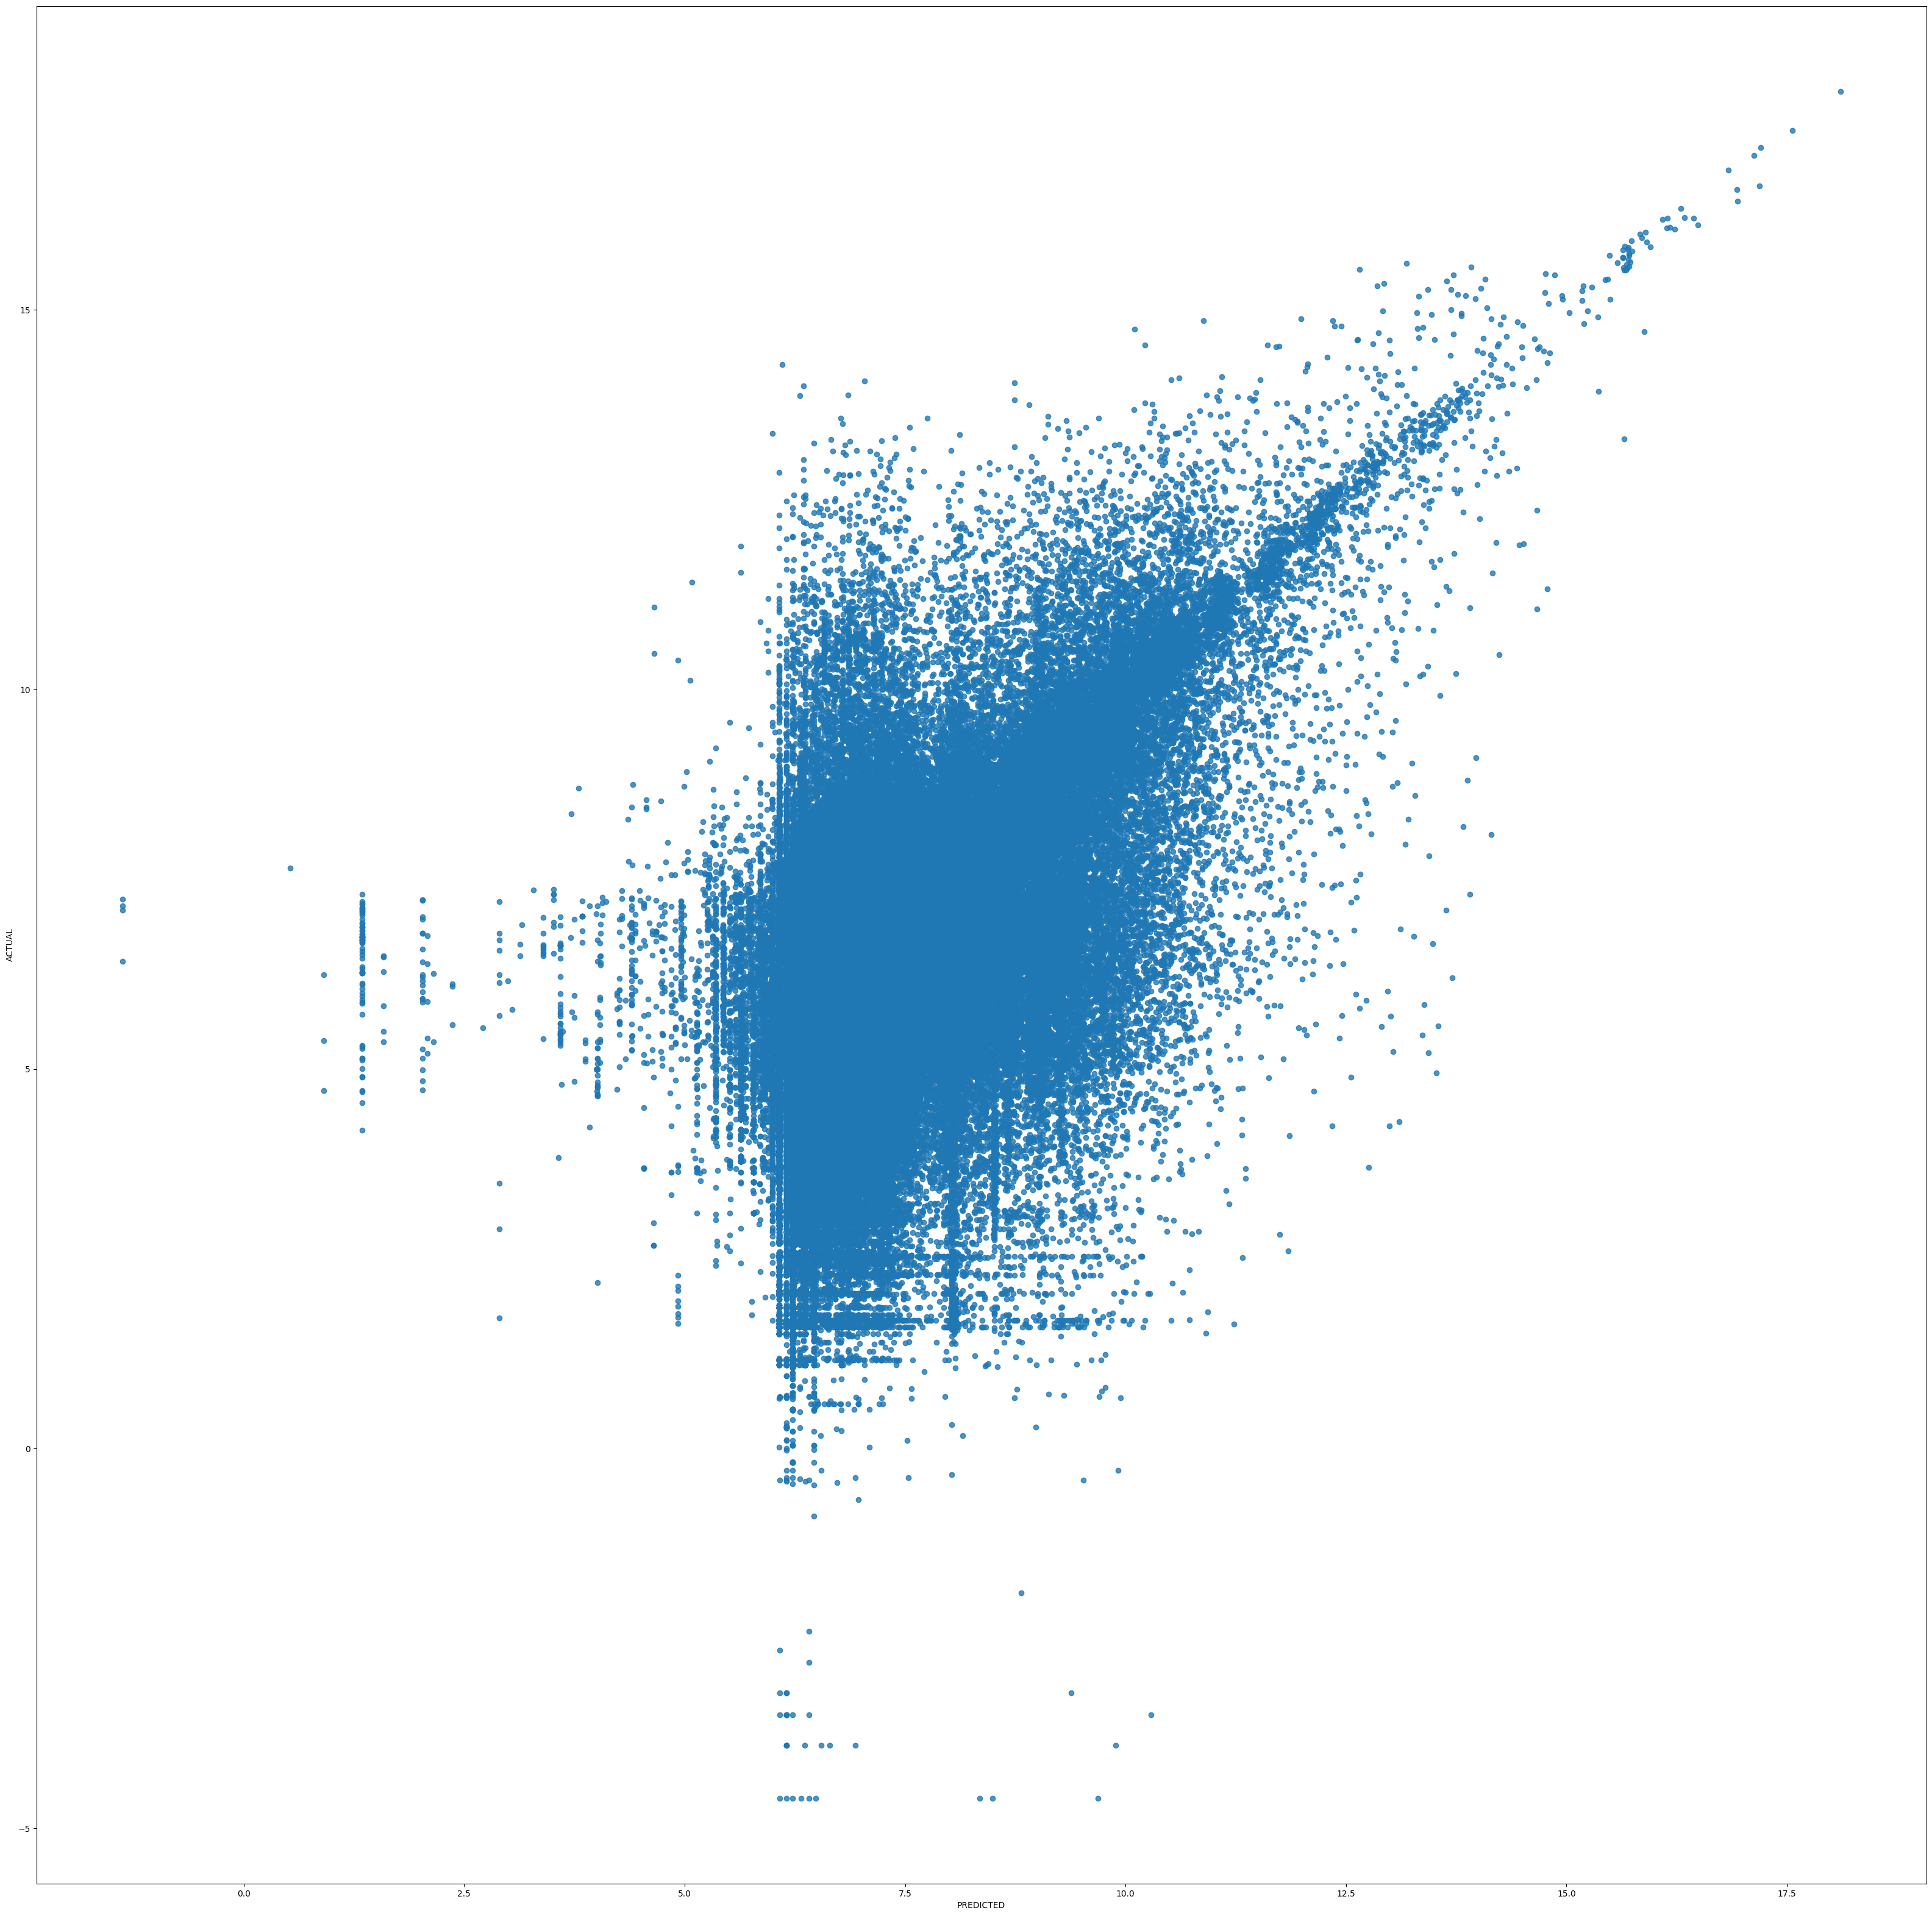

In [116]:
plt.figure(figsize=(40,40))
sns.regplot(valuesDF.apply(np.log),x='PREDICTED',y='ACTUAL')

In [89]:
valuesDF.corr()

,PREDICTED,ACTUAL
PREDICTED,1.000000,0.954056
ACTUAL,0.954056,1.000000


The correlation is very low in the middle part of the loged values that means the lower values of AMOUNT_ORDER is not predicted accurately

There is a slight overfitting in the models due to skewed data 

## Tests

Lets convert the currency to USD

In [90]:
test_data=pd.read_csv('./Final.csv')

In [91]:
currency_rates={'AED': 0.27,
 'SAR': 0.27,
 'BHD': 2.65,
 'KWD': 3.25,
 'QAR': 0.27,
 'EUR': 1.0981,
 'CHF': 1.1191,
 'CZK': 0.047,
 'GBP': 1.2426,
 'RON': 0.2222,
 'USD': 1.0,
 'PLN': 0.2372,
 'HU1': 0.003,
 'SEK': 0.097,
 'CAD': 0.7484,
 'HKD': 0.1274,
 'AUD': 0.6714,
 'MYR': 0.2261,
 'SGD': 0.7514,
 'NZD': 0.6198}

In [92]:
def convert_currency(a,currency):
    return currency_rates[currency]*float(a)

In [93]:
test_data['ORDER_AMOUNT']=test_data['ORDER_AMOUNT'].str.replace('-','')
test_data['ORDER_AMOUNT']=test_data['ORDER_AMOUNT'].str.replace(',','.')
test_data['ORDER_AMOUNT']=test_data['ORDER_AMOUNT'].astype('float64')

In [94]:
test_data['RELEASED_CREDIT_VALUE']=test_data['RELEASED_CREDIT_VALUE'].str.replace('-','')
test_data['RELEASED_CREDIT_VALUE']=test_data['RELEASED_CREDIT_VALUE'].str.replace(',','.')
test_data['RELEASED_CREDIT_VALUE']=test_data['RELEASED_CREDIT_VALUE'].astype('float64')

In [95]:
test_data['AMOUNT_IN_USD']=list(map(convert_currency,test_data['ORDER_AMOUNT'],test_data['ORDER_CURRENCY']))
test_data['CRED_VALUE_IN_USD']=list(map(convert_currency,test_data['RELEASED_CREDIT_VALUE'],test_data['ORDER_CURRENCY']))

In [96]:
print(test_data.corr(numeric_only=True)['ORDER_AMOUNT']['RELEASED_CREDIT_VALUE'])

0.9691656910476487


In [97]:
print(test_data.corr(numeric_only=True)['AMOUNT_IN_USD']['RELEASED_CREDIT_VALUE'])

0.06626164396202566


In [98]:
print(test_data.corr(numeric_only=True)['AMOUNT_IN_USD']['CRED_VALUE_IN_USD'])

0.6448735031371065


Converting the amount to USD losses the high correlation between the ORDER_AMOUNT and RELEASED_CREDIT_VALUE. So we can use model to predict the ORDER_AMOUNT snd then convert it to USD afterwards

In [99]:
# newDF=pd.test_dataFrame(np.random.rand(100,2))

In [100]:
# scl=np.random.rand(100,1)

In [101]:
# (newDF*scl).corr()

In [102]:
# newDF.corr()

Removing outliers

<AxesSubplot: xlabel='COMPANY_CODE', ylabel='ORDER_AMOUNT'>

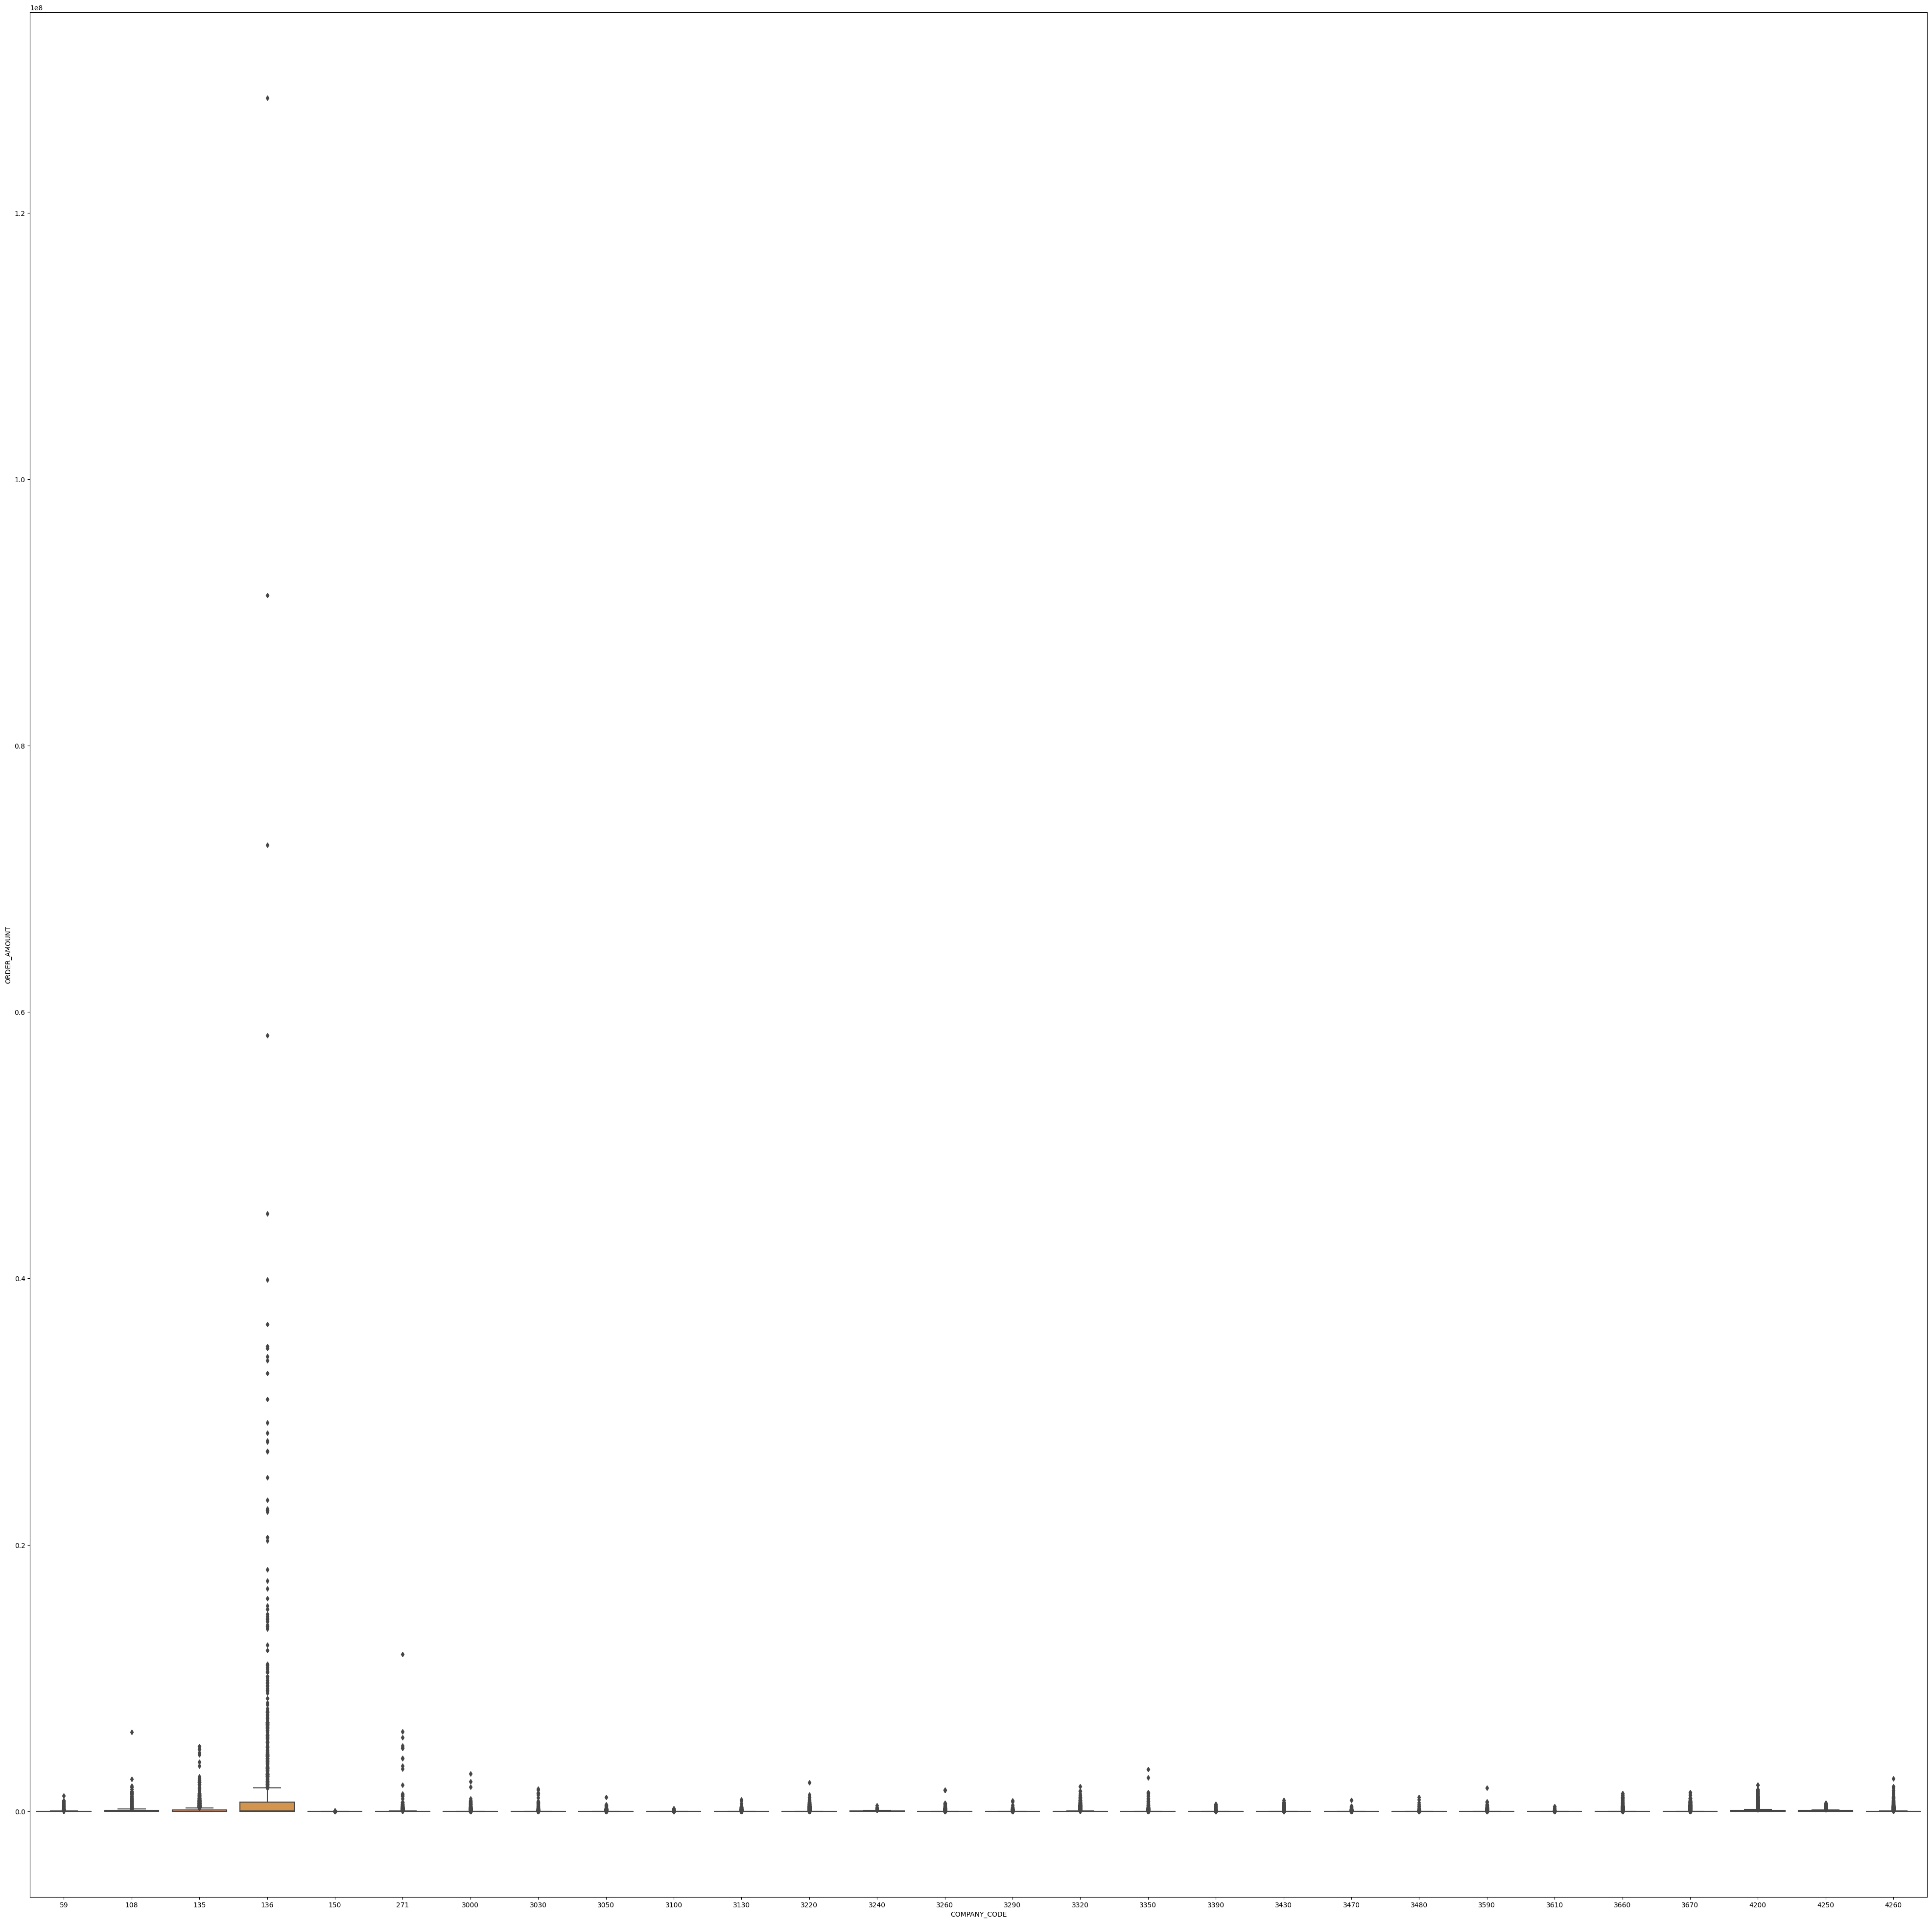

In [103]:
plt.figure(figsize=(50,50))
sns.boxplot(data=test_data,x='COMPANY_CODE',y='ORDER_AMOUNT')

In [104]:
median = test_data['ORDER_AMOUNT'].median()
test_data['ORDER_AMOUNT'] = test_data['ORDER_AMOUNT'].mask(test_data['ORDER_AMOUNT'] > 2000000, median)
median = test_data['RELEASED_CREDIT_VALUE'].median()
test_data['RELEASED_CREDIT_VALUE'] = test_data['RELEASED_CREDIT_VALUE'].mask(test_data['RELEASED_CREDIT_VALUE'] > 2000000, median)

<AxesSubplot: xlabel='COMPANY_CODE', ylabel='ORDER_AMOUNT'>

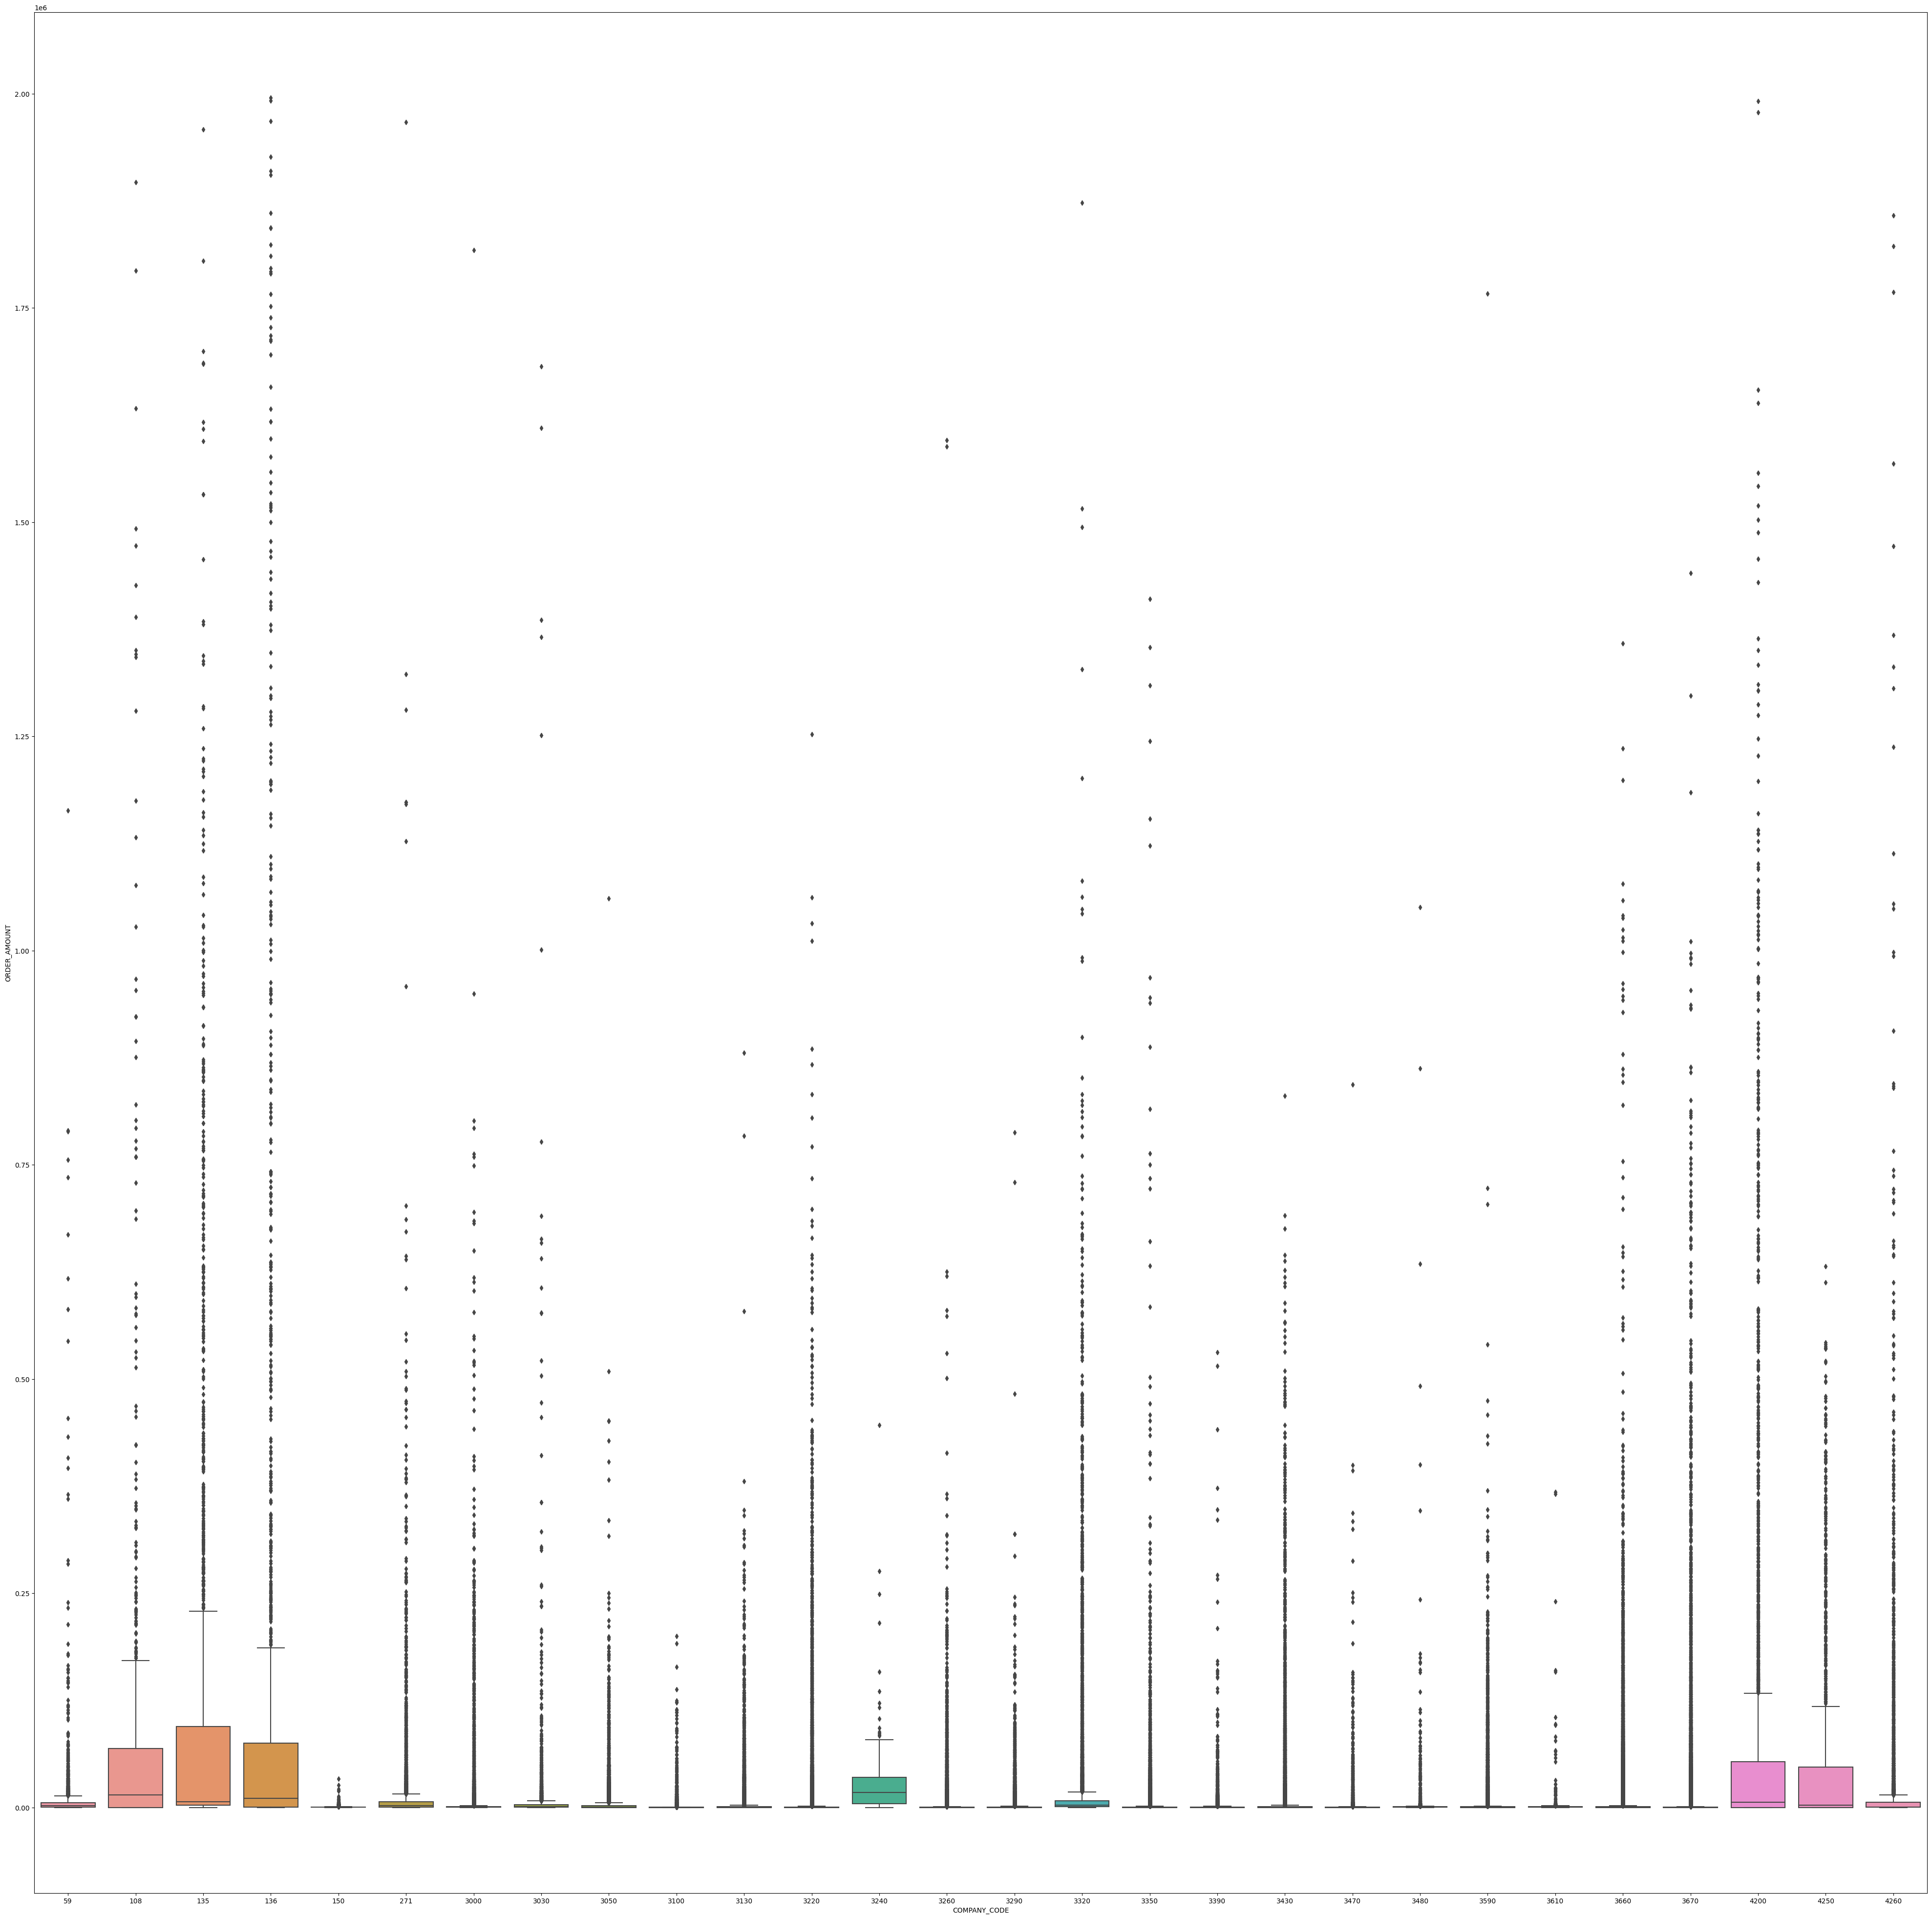

In [105]:
plt.figure(figsize=(50,50))
sns.boxplot(data=test_data,x='COMPANY_CODE',y='ORDER_AMOUNT')

<AxesSubplot: >

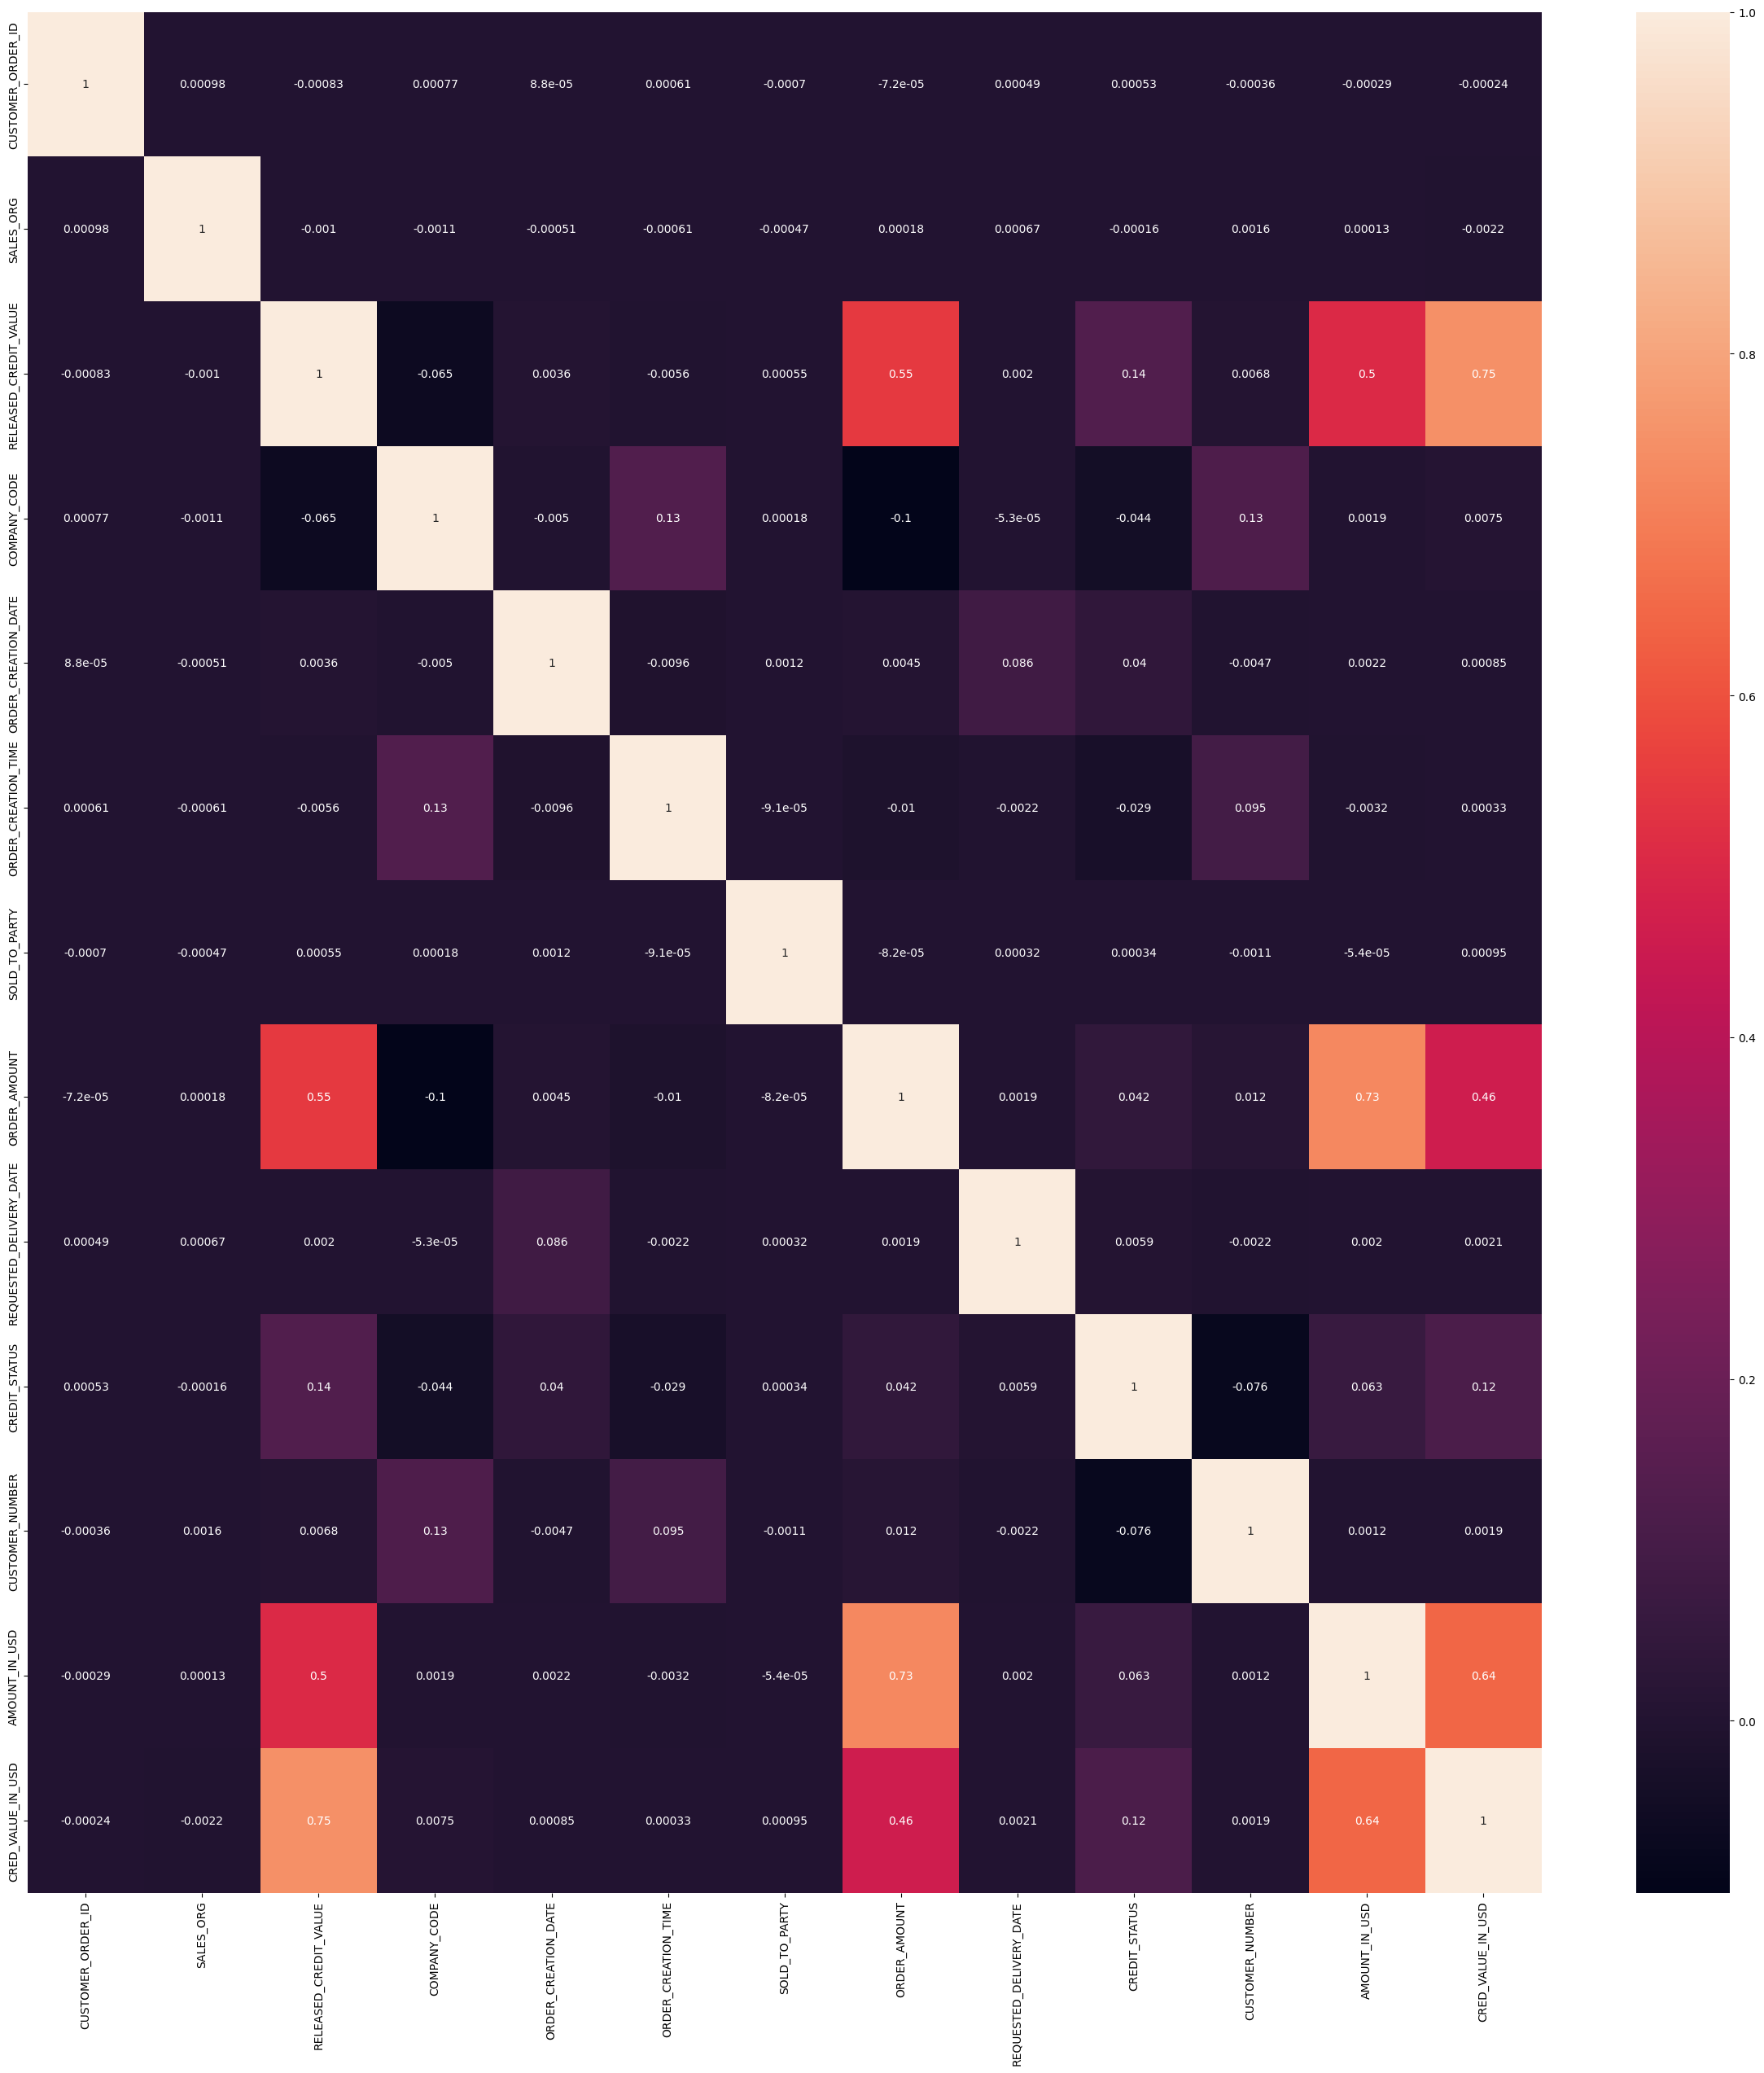

In [106]:
plt.figure(figsize=(30,30))
sns.heatmap(test_data.corr(numeric_only=True),annot=True)

In [107]:
# plt.figure(figsize=(50,50)

In [108]:
lower_quat=test_data.groupby('COMPANY_CODE').quantile(q=.25,numeric_only=True)['ORDER_AMOUNT']
upper_quat=test_data.groupby('COMPANY_CODE').quantile(q=.75,numeric_only=True)['ORDER_AMOUNT']
IQR=upper_quat-lower_quat
print(lower_quat,upper_quat)

COMPANY_CODE
59       383.8200
108        0.0000
135     2878.9900
136      276.1200
150      241.4775
271      589.0200
3000     137.4400
3030     280.5000
3050      91.7075
3100      27.1150
3130       0.0000
3220       0.0000
3240    4224.2250
3260       0.0000
3290       0.0000
3320     987.4800
3350       0.0000
3390       0.0000
3430      45.8400
3470       0.0000
3480     204.0000
3590      67.2000
3610     181.4000
3660     104.3200
3670       0.0000
4200       0.0000
4250       0.0000
4260     159.9400
Name: ORDER_AMOUNT, dtype: float64 COMPANY_CODE
59       5720.3600
108     68761.8050
135     94249.9200
136     74971.0000
150       560.3900
271      6690.3700
3000      829.1700
3030     3220.0150
3050     2278.6200
3100      239.0100
3130     1041.9800
3220      553.6800
3240    35012.7550
3260      440.2100
3290      559.9200
3320     7907.0000
3350      644.9100
3390      605.5925
3430     1084.2000
3470      484.8000
3480      745.8500
3590      765.1250
3610      888.085

In [109]:
median = test_data.groupby('COMPANY_CODE').median(numeric_only=True)['ORDER_AMOUNT']

In [110]:
new_column=[]
print(test_data['ORDER_AMOUNT'])
for i in test_data.index:
    val=test_data['ORDER_AMOUNT'][int(i)]
    tag=test_data['COMPANY_CODE'][int(i)]
    if val>=(upper_quat[tag]):
        new_column.append(median[tag])
    elif val<=(lower_quat[tag]):
        new_column.append(median[tag])
    else:
        new_column.append(val)
test_data['ORDER_AMOUNT']=new_column
print(test_data['ORDER_AMOUNT'])

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1101920     4415.19
1101921        0.00
1101922        0.00
1101923        0.00
1101924     4415.19
Name: ORDER_AMOUNT, Length: 1101925, dtype: float64
0           171.255
1           171.255
2             0.000
3           178.180
4           178.180
             ...   
1101920    4415.190
1101921     442.560
1101922     442.560
1101923     442.560
1101924    4415.190
Name: ORDER_AMOUNT, Length: 1101925, dtype: float64


<AxesSubplot: xlabel='COMPANY_CODE', ylabel='ORDER_AMOUNT'>

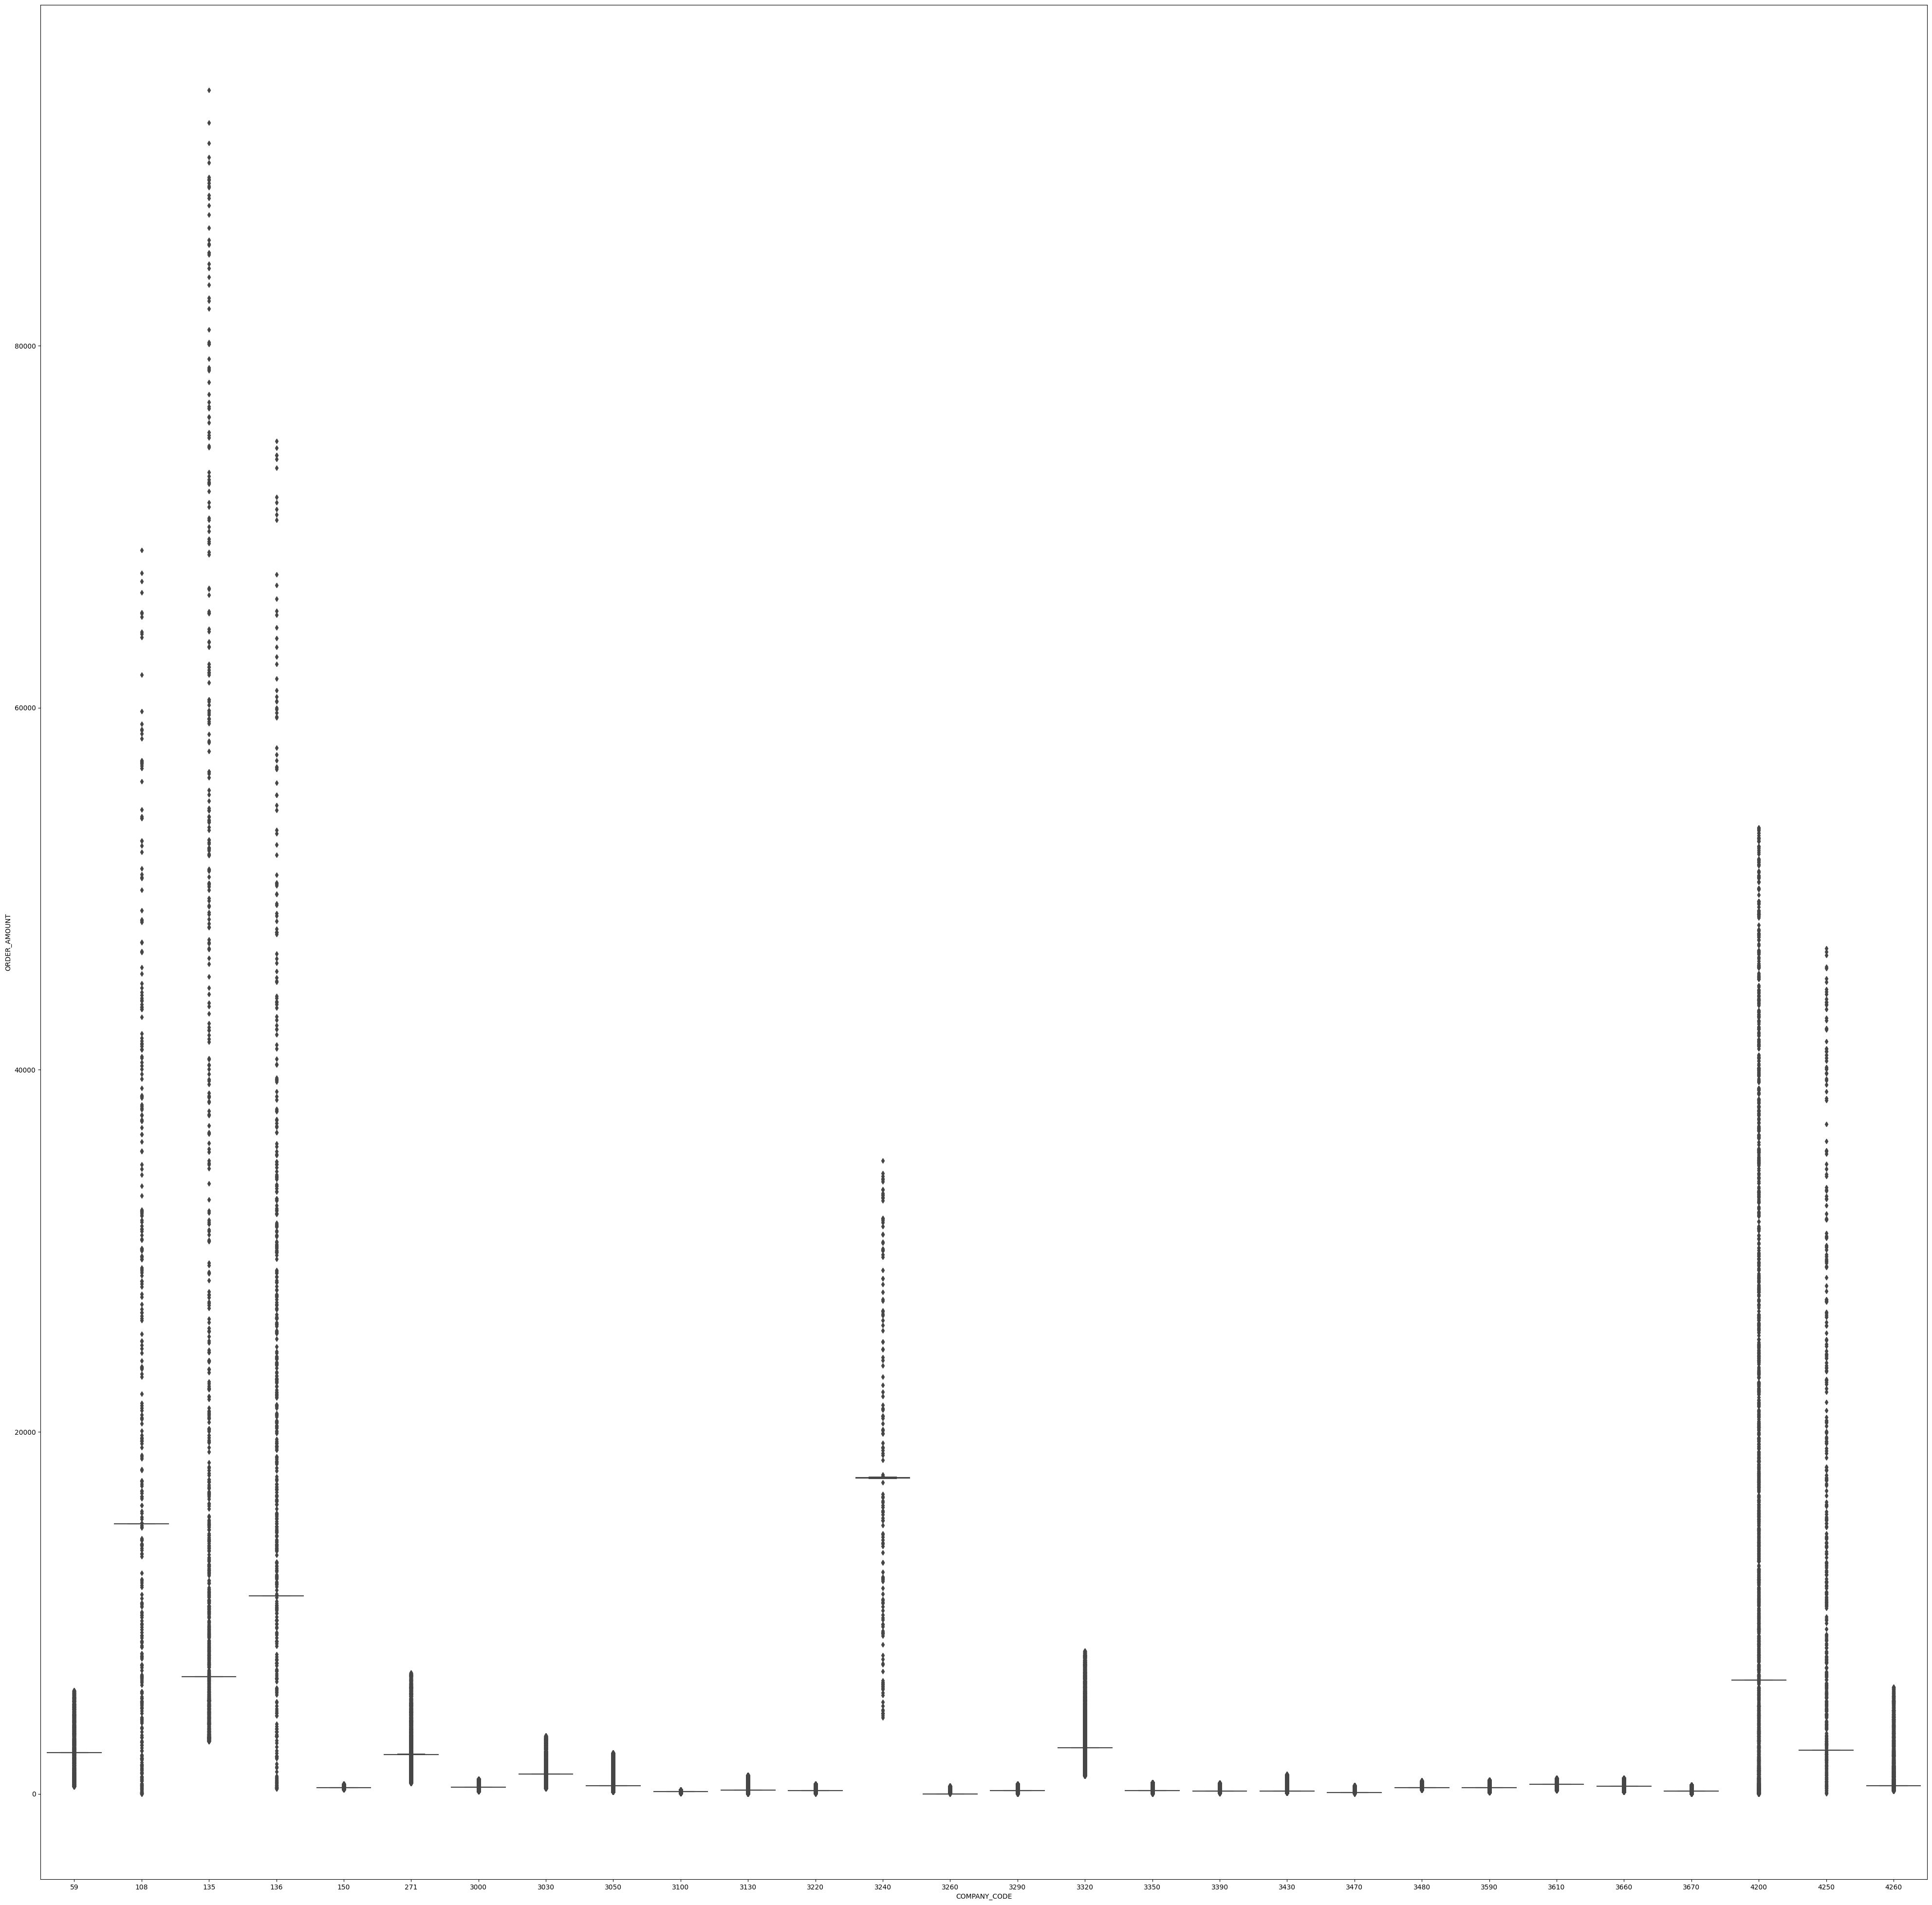

In [111]:
plt.figure(figsize=(50,50))
sns.boxplot(data=test_data,x='COMPANY_CODE',y='ORDER_AMOUNT')

<AxesSubplot: >

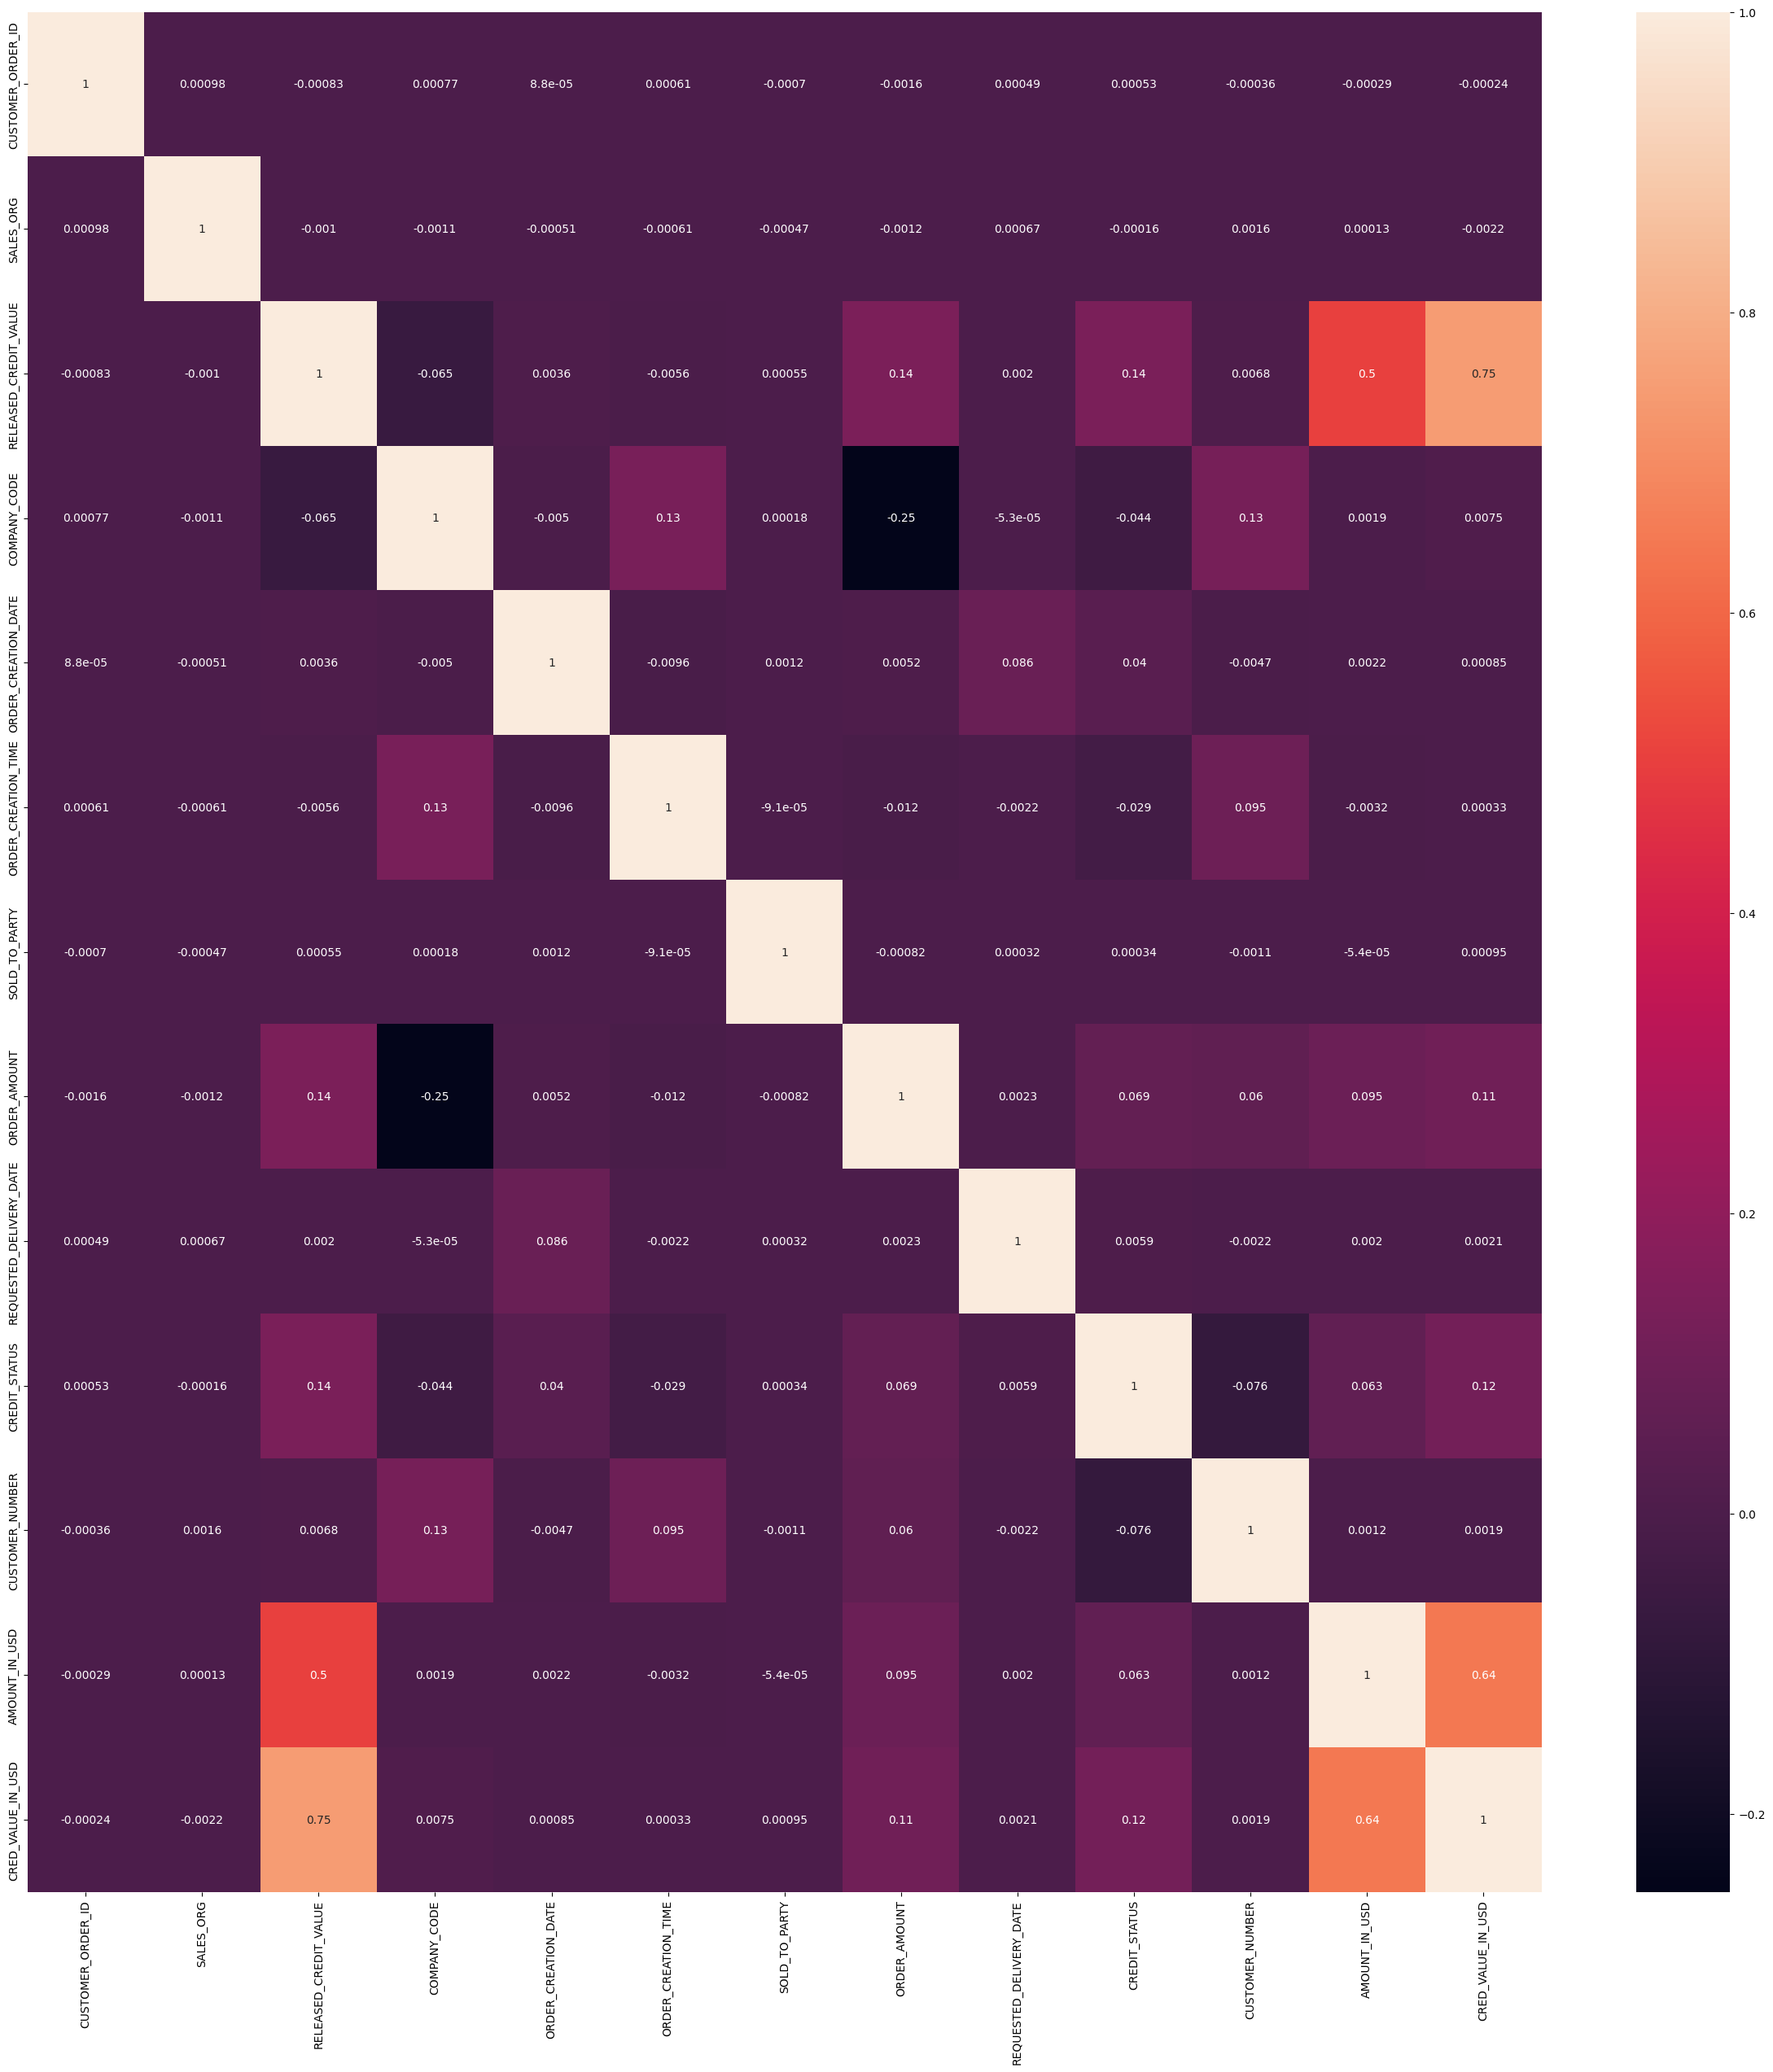

In [112]:
plt.figure(figsize=(30,30))
sns.heatmap(test_data.corr(numeric_only=True),annot=True)

This method of outlier handeling reduces the correlation

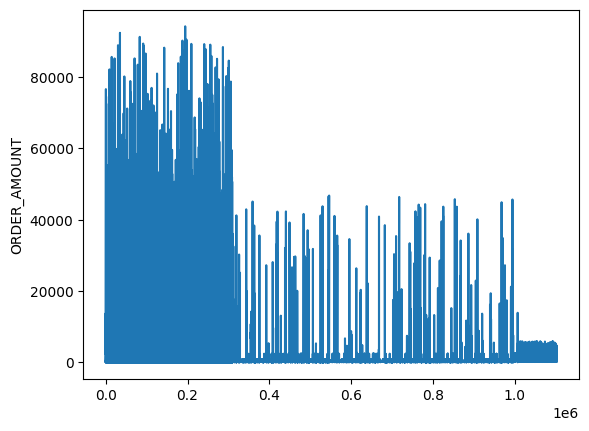

<AxesSubplot: ylabel='RELEASED_CREDIT_VALUE'>

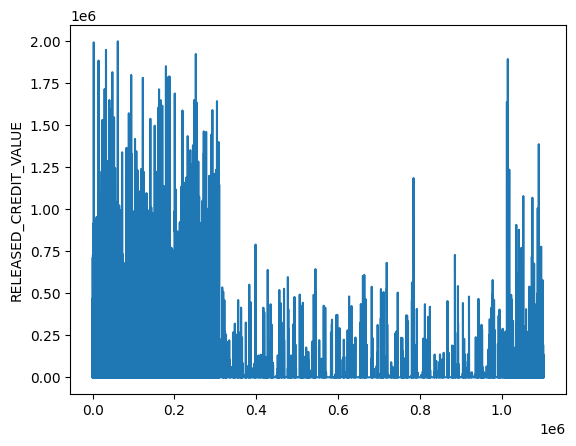

In [113]:
sns.lineplot(test_data['ORDER_AMOUNT'])
plt.show()
sns.lineplot(test_data['RELEASED_CREDIT_VALUE'])


The data is skewed so we apply log transform    

In [117]:
test_data['ORDER_AMOUNT']=test_data['ORDER_AMOUNT'].apply(lambda a:np.log(a+1))
test_data['RELEASED_CREDIT_VALUE']=test_data['RELEASED_CREDIT_VALUE'].apply(lambda a:np.log(a+1))

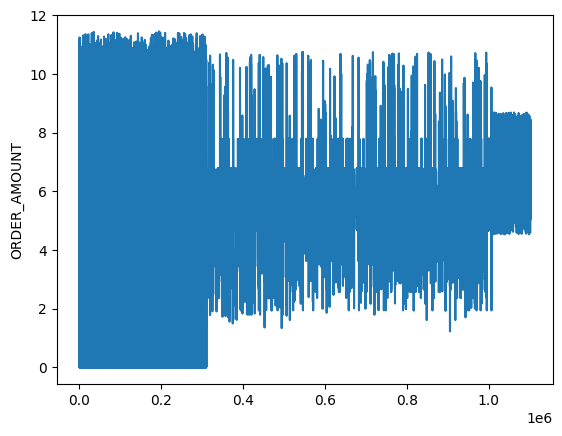

<AxesSubplot: ylabel='RELEASED_CREDIT_VALUE'>

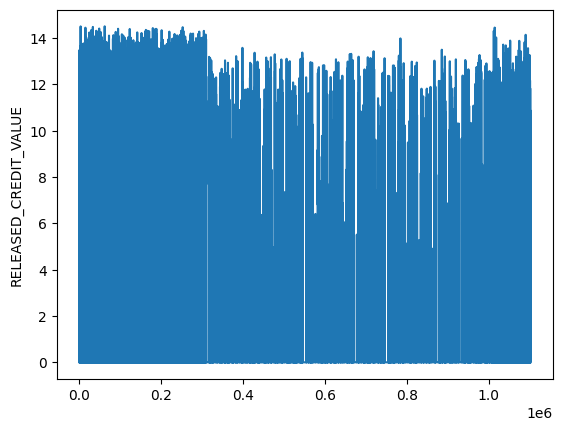

In [118]:
sns.lineplot(test_data['ORDER_AMOUNT'])
plt.show()
sns.lineplot(test_data['RELEASED_CREDIT_VALUE'])
